![book](https://raw.githubusercontent.com/ageron/tensorflow-safari-course/master/images/intro_to_tf_course.png)

This Jupyter notebook accompanies my [Introduction to TensorFlow](https://www.safaribooksonline.com/live-training/courses/introduction-to-tensorflow/0636920079521/) live online training. It contains the code examples shown in the presentation, as well as the exercises and their solutions.

**Try not to peek at the solutions when you go through the exercises. ;-)**

First let's make sure this notebook works well in both Python 2 and Python 3:

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow basics

In [2]:
import tensorflow as tf
tf.__version__

'1.2.0'

## Construction Phase

In [3]:
>>> a = tf.constant(3)
>>> b = tf.constant(5)
>>> s = a + b

In [4]:
a

<tf.Tensor 'Const:0' shape=() dtype=int32>

In [5]:
b

<tf.Tensor 'Const_1:0' shape=() dtype=int32>

In [6]:
s

<tf.Tensor 'add:0' shape=() dtype=int32>

In [7]:
tf.get_default_graph()

In [8]:
>>> graph = tf.Graph()
>>> with graph.as_default():
...     a = tf.constant(3)
...     b = tf.constant(5)
...     s = a + b
...

## Execution Phase

In [9]:
>>> with tf.Session(graph=graph) as sess:
...     result = s.eval()
...
>>> result

8

In [10]:
>>> with tf.Session(graph=graph) as sess:
...     result = sess.run(s)
...
>>> result

8

In [11]:
>>> with tf.Session(graph=graph) as sess:
...     result = sess.run([a,b,s])
...
>>> result

[3, 5, 8]

## Exercise 1

![Exercise](https://c1.staticflickr.com/9/8101/8553474140_c50cf08708_b.jpg)

1.1) Create a simple graph that calculates $ c = \exp(\sqrt 8 + 3) $.

**Tip**: TensorFlow's API documentation is available at:
https://www.tensorflow.org/versions/master/api_docs/python/

1.2) Now create a `Session()` and evaluate the operation that gives you the result of the equation above:

1.3) Create a graph that evaluates and prints both $ b = \sqrt 8 $ and $ c = \exp(\sqrt 8 + 3) $. Try to implement this in a way that only evaluates $ \sqrt 8 $ once.

1.4) The following code is needed to display TensorFlow graphs in Jupyter. Just run this cell then visualize your graph by calling `show_graph(`_your graph_`)`:

In [12]:
import numpy as np
from IPython.display import display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def=None, max_const_size=32):
    """Visualize TensorFlow graph."""
    graph_def = graph_def or tf.get_default_graph()
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

Try not to peek at the solution below before you have done the exercise! :)

![thinking](https://upload.wikimedia.org/wikipedia/commons/0/06/Filos_segundo_logo_%28flipped%29.jpg)

## Exercise 1 - Solution

1.1)

In [13]:
graph = tf.Graph()
with graph.as_default():
    c = tf.exp(tf.sqrt(tf.constant(8.)) + tf.constant(3.))
    # or simply...
    c = tf.exp(tf.sqrt(8.) + 3.)

1.2)

In [14]:
with tf.Session(graph=graph):
    c_val = c.eval()

In [15]:
c_val

339.82382

1.3)

In [16]:
graph = tf.Graph()
with graph.as_default():
    b = tf.sqrt(8.)
    c = tf.exp(b + 3)

In [17]:
with tf.Session(graph=graph) as sess:
    b_val, c_val = sess.run([b, c])

In [18]:
b_val

2.8284271

In [19]:
c_val

339.82382

**Important**: the following implementation gives the right result, but it runs the graph twice, once to evaluate `b`, and once to evaluate `c`.  Since `c` depends on `b`, it means that `b` will be evaluated twice. Not what we wanted.

In [20]:
# WRONG!
with tf.Session(graph=graph):
    b_val = b.eval()  # evaluates b
    c_val = c.eval()  # evaluates c, which means evaluating b again!

In [21]:
b_val

2.8284271

In [22]:
c_val

339.82382

1.4)

In [23]:
show_graph(graph)

## Variables

In [24]:
>>> graph = tf.Graph()
>>> with graph.as_default():
...     x = tf.Variable(100)
...     c = tf.constant(5)
...     increment_op = tf.assign(x, x + c)
...

In [25]:
>>> with tf.Session(graph=graph) as sess:
...     x.initializer.run()
...     print(x.eval())    # 100
...     for iteration in range(10):
...         increment_op.eval()
...     print(x.eval())    # 150
...

100
150


## Variables Initializer

In [26]:
>>> graph = tf.Graph()
>>> with graph.as_default():
...     x = tf.Variable(100)
...     c = tf.constant(5)
...     increment_op = tf.assign(x, x + c)
...     init = tf.global_variables_initializer()
...

In [27]:
>>> with tf.Session(graph=graph) as sess:
...     init.run()
...     print(x.eval())    # 100
...     for iteration in range(10):
...         increment_op.eval()
...     print(x.eval())    # 150
...

100
150


## Variable State

In [28]:
>>> session1 = tf.Session(graph=graph)
>>> session2 = tf.Session(graph=graph)
>>> x.initializer.run(session=session1)
>>> x.initializer.run(session=session2)

In [29]:
>>> increment_op.eval(session=session1)

105

In [30]:
>>> x.eval(session=session1)

105

In [31]:
>>> x.eval(session=session2)

100

In [32]:
>>> session1.close()
>>> session2.close()

## Exercise 2

![Exercise](https://c1.staticflickr.com/9/8101/8553474140_c50cf08708_b.jpg)

In this exercise, we will use TensorFlow to compute $ 1 + \frac{1}{2} + \frac{1}{4} + \frac{1}{8} + \cdots $ by creating a simple graph then running it multiple times.

Think about how you would solve this problem (and if you are feeling confident enough, go ahead and implement your ideas), then follow the instructions below.

2.1) Create a graph with two variables $ x $ and $ y $, initialized to 0.0 and 1.0 respectively. Create an operation that will perform the following assignment: $ x \gets x + y $. Create a second operation that will perform the following assignment: $ y \gets \dfrac{y}{2} $.

2.2) Now create a `Session()`, initialize the variables, then create a loop that will run 50 times, and at each iteration will run the first assignment operation, then the second (separately). Finally, print out the value of $ x $. The result should be very close (or equal to) 2.0.

2.3) Try to run the assignment operations simultaneously. What happens to the result? Run your code multiply times: do the results vary? Can you explain what is happening?

2.5) Bonus question (if you have time): update you graph to define the second assignment ($y \gets \frac{y}{2}$) inside a `tf.control_dependencies()` block, to  guarantee that it runs after the first assignment ($ x \gets x + y$). Does this finally solve the problem?

Try not to peek at the solution below before you have done the exercise! :)

![thinking](https://upload.wikimedia.org/wikipedia/commons/0/06/Filos_segundo_logo_%28flipped%29.jpg)

## Exercise 2 - Solution

2.1)

In [33]:
graph = tf.Graph()
with graph.as_default():
    x = tf.Variable(0.0)
    y = tf.Variable(1.0)
    add = tf.assign(x, x + y)
    divide = tf.assign(y, y / 2)
    init = tf.global_variables_initializer()

2.2)

In [34]:
with tf.Session(graph=graph):
    init.run()
    for iteration in range(20):
        add.eval()
        divide.eval()
    result = x.eval()

In [35]:
print(result)

2.0


2.3)

In [36]:
with tf.Session(graph=graph) as sess:
    init.run()
    for iteration in range(20):
        sess.run([add, divide])
    result = x.eval()

In [37]:
result

1.9999981

2.4)

In [38]:
graph = tf.Graph()
with graph.as_default():
    x = tf.Variable(0.0)
    y = tf.Variable(1.0)
    add = tf.assign(x, x + y)
    with tf.control_dependencies([add]):
        divide = tf.assign(y, y / 2)
    init = tf.global_variables_initializer()

In [39]:
with tf.Session(graph=graph) as sess:
    init.run()
    for iteration in range(30):
        sess.run([add, divide])
    result = x.eval()

In [40]:
result

2.0

## Collections

In [41]:
>>> graph.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)

[<tf.Variable 'Variable:0' shape=() dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=() dtype=float32_ref>]

In [42]:
tf.GraphKeys.GLOBAL_VARIABLES

'variables'

In [43]:
>>> graph.add_to_collection("my_collection", c)
>>> graph.get_collection("my_collection")

[<tf.Tensor 'Const:0' shape=() dtype=int32>]

## Navigating the Graph

In [44]:
>>> graph = tf.Graph()
>>> with graph.as_default():
...     a = tf.constant(3)
...     b = tf.constant(5)
...     s = a + b
...
>>> graph.get_operations()

[<tf.Operation 'Const' type=Const>,
 <tf.Operation 'Const_1' type=Const>,
 <tf.Operation 'add' type=Add>]

In [45]:
>>> graph.get_operation_by_name("add") is s.op

True

In [46]:
>>> graph.get_tensor_by_name("add:0") is s

True

In [47]:
>>> list(s.op.inputs)

[<tf.Tensor 'Const:0' shape=() dtype=int32>,
 <tf.Tensor 'Const_1:0' shape=() dtype=int32>]

In [48]:
>>> list(s.op.outputs)

[<tf.Tensor 'add:0' shape=() dtype=int32>]

## Naming Operations

In [49]:
>>> graph = tf.Graph()
>>> with graph.as_default():
...     a = tf.constant(3, name='a')
...     b = tf.constant(5, name='b')
...     s = tf.add(a, b, name='s')
...


In [50]:
>>> graph.get_operations()

[<tf.Operation 'a' type=Const>,
 <tf.Operation 'b' type=Const>,
 <tf.Operation 's' type=Add>]

## Exercise 3

![Exercise](https://c1.staticflickr.com/9/8101/8553474140_c50cf08708_b.jpg)

3.1) Create a graph with four variables named `"x1"`, `"x2"`, `"x3"` and `"x4"`, with initial values 1.0, 2.0, 3.0 and 4.0 respectively, then write some code that prints the name of every operation in the graph.

3.2) Notice that for each `Variable`, TensorFlow actually created 4 operations:
* the variable itself,
* its initial value,
* an assignment operation to assign the initial value to the variable,
* and a read operation that you can safely ignore for now (for details, check out mrry's great answer to [this question](http://stackoverflow.com/questions/42783909/internals-of-variable-in-tensorflow)).

Get the collection of global variables in the graph, and for each one of them use `get_operation_by_name()` to find its corresponding `/Assign` operation (just append `"/Assign"` to the variable's name).

Hint: each object in the collection of global variables is actually a `Tensor`, not an `Operation` (it represents the variable's output, i.e., its value), so its name ends with `":0"`. You can get the `Operation` through the `Tensor`'s `op` attribute: its name will not end with `":0"`

3.3) Add a `tf.group()` to your graph, containing all the assignment operations you got in question 3.2. Congratulations! You have just reimplemented `tf.global_variables_initializer()`.

Start a `Session()`, run your group operation, then evaluate each variable and print out the result.

3.4) For each assignment operation you fetched earlier, get its second input and store it in a list. Next, start a session and evaluate that list (using `sess.run()`). Print out the result: you should see `[1.0, 2.0, 3.0, 4.0]`. Can you guess why?

Try not to peek at the solution below before you have done the exercise! :)

![thinking](https://upload.wikimedia.org/wikipedia/commons/0/06/Filos_segundo_logo_%28flipped%29.jpg)

## Exercise 3 - Solution

3.1)

In [51]:
graph = tf.Graph()
with graph.as_default():
    x1 = tf.Variable(1.0, name="x1")
    x2 = tf.Variable(2.0, name="x2")
    x3 = tf.Variable(3.0, name="x3")
    x4 = tf.Variable(4.0, name="x4")

3.2)

In [52]:
gvars = graph.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
init_assign_ops = [graph.get_operation_by_name(gvar.op.name + "/Assign")
                   for gvar in gvars]

In [53]:
init_assign_ops

[<tf.Operation 'x1/Assign' type=Assign>,
 <tf.Operation 'x2/Assign' type=Assign>,
 <tf.Operation 'x3/Assign' type=Assign>,
 <tf.Operation 'x4/Assign' type=Assign>]

3.3)

In [54]:
with graph.as_default():
    init = tf.group(*init_assign_ops)

In [55]:
with tf.Session(graph=graph):
    init.run()
    print(x1.eval())
    print(x2.eval())
    print(x3.eval())
    print(x4.eval())

1.0
2.0
3.0
4.0


3.4)

In [56]:
init_val_ops = [init_assign_op.inputs[1]
                for init_assign_op in init_assign_ops]

In [57]:
with tf.Session(graph=graph) as sess:
    print(sess.run(init_val_ops))

[1.0, 2.0, 3.0, 4.0]


Explanation: in the case of assignment operations, the first input is a reference to the variable, and the second is the assignment value. The assignment operations we have here are used to initialize the variables, so their assignment values correspond to the initial values: 1.0 for `x1`, 2.0 for `x2`, 3.0 for `x3` and 4.0 for `x4`.

# Linear Regression with TensorFlow

## Loading the training data

In [58]:
import numpy as np

data = np.loadtxt("data/life_satisfaction.csv",
                  dtype=np.float32,
                  delimiter=",",
                  skiprows=1,
                  usecols=[1, 2])
X_train = data[:, 0:1] / 10000 # feature scaling
y_train = data[:, 1:2]

Each row in `X_train` represents a training instance, in this case a country. In this simple regression example, there is just one feature per instance (i.e., one column), in this case the country's GDP per capita (in tens of thousands of dollars).

In [59]:
X_train

array([[ 0.90549141],
       [ 0.94373721],
       [ 1.22398937],
       [ 1.24953341],
       [ 1.59917367],
       [ 1.72880816],
       [ 1.80642867],
       [ 1.9121592 ],
       [ 2.07324815],
       [ 2.58647203],
       [ 2.71951962],
       [ 2.9866581 ],
       [ 3.24855447],
       [ 3.53433371],
       [ 3.70448899],
       [ 3.76750088],
       [ 4.01066351],
       [ 4.09965134],
       [ 4.19739866],
       [ 4.33319616],
       [ 4.36031151],
       [ 4.37240314],
       [ 4.37706852],
       [ 4.98662663],
       [ 5.08545828],
       [ 5.09618616],
       [ 5.13507414],
       [ 5.21141624],
       [ 5.58052015]], dtype=float32)

In [60]:
y_train

array([[ 6.        ],
       [ 5.5999999 ],
       [ 4.9000001 ],
       [ 5.80000019],
       [ 6.0999999 ],
       [ 5.5999999 ],
       [ 4.80000019],
       [ 5.0999999 ],
       [ 5.69999981],
       [ 6.5       ],
       [ 5.80000019],
       [ 6.        ],
       [ 5.9000001 ],
       [ 7.4000001 ],
       [ 7.30000019],
       [ 6.5       ],
       [ 6.9000001 ],
       [ 7.        ],
       [ 7.4000001 ],
       [ 7.30000019],
       [ 7.30000019],
       [ 6.9000001 ],
       [ 6.80000019],
       [ 7.19999981],
       [ 7.5       ],
       [ 7.30000019],
       [ 7.        ],
       [ 7.5       ],
       [ 7.19999981]], dtype=float32)

## Plot the data

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

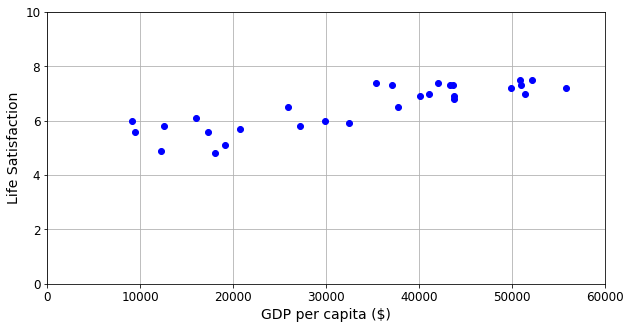

In [62]:
def plot_life_satisfaction(X_train, y_train):
    plt.plot(X_train * 10000, y_train, "bo")
    plt.axis([0, 60000, 0, 10])
    plt.xlabel("GDP per capita ($)")
    plt.ylabel("Life Satisfaction")
    plt.grid()

plt.figure(figsize=(10,5))
plot_life_satisfaction(X_train, y_train)
plt.show()

## Building the Linear Regression Model

## Exercise 4

![Exercise](https://c1.staticflickr.com/9/8101/8553474140_c50cf08708_b.jpg)

In this exercise we will build a linear regression model using TensorFlow. If you are not familiar with the maths behind linear regression models, you can read the explanation below. If you already know this (or if you don't care much about the maths), you can just skip this explanation and simply follow the instructions given in questions 4.1 to 4.3 below.

In a linear regression model, the predictions are a linear combination of the input features. In other words, the predicted value $\hat{y}$ can be computed using the following equation:

$\hat{y} = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b$

where:
* $x_1, x_2, \dots, x_n $ are the input features,
* $w_1, w_2, \dots, w_n $, are their corresponding weights,
* and $b$ is the bias term (also called the intercept term).

This equation can be expressed in a more compact way using vectors:

$\hat{y} = \langle \mathbf{x}, \mathbf{w} \rangle + b$

where:
* $ \mathbf{x} = \begin{pmatrix}x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix}$ is the input feature vector (by convention, vectors are written in bold font),
* $ \mathbf{w} = \begin{pmatrix}w_1 \\ w_2 \\ \vdots \\ w_n \end{pmatrix}$ is the weight vector,
* $\langle \mathbf{x}, \mathbf{w} \rangle$ is the inner product of vectors $\mathbf{x}$ and $\mathbf{w}$, equal to $w_1 x_1 + w_2 x_2 + \dots + w_n x_n$.

It is often more convenient to handle vectors as matrices with a single column (a "column vector"). The inner product $\langle \mathbf{x}, \mathbf{w} \rangle$ is then replaced with the matrix dot product: $\mathbf{x}^T \cdot \mathbf{w}$, where $\mathbf{x}^T$ is the transpose of the column vector $\mathbf{x}$. Transposing a column vector gives you a "row vector" (i.e., a matrix with a single row): $\mathbf{x}^T = \begin{pmatrix} x_1 & x_2 & \dots & x_n \end{pmatrix}$. Once again $\mathbf{x}^T \cdot \mathbf{w} = w_1 x_1 + w_2 x_2 + \dots + w_n x_n$.

Lastly, it is possible to compute predictions for many instances at a time by putting all their input features in a matrix $\mathbf{X}$ (by convention, matrices are in capital letters with a bold font, except when they just represent column or row vectors). The vector containing the predictions for every instance can be computed using the following equation:

$\hat{\mathbf{y}} = \mathbf{X} \cdot \mathbf{w} + b$

where:
* $ \hat{\mathbf{y}} = \begin{pmatrix}\hat{y}^{(1)} \\ \hat{y}^{(2)} \\ \vdots \\ \hat{y}^{(m)} \end{pmatrix}$ is the prediction vector, containing the predictions for all $m$ instances.
* $ \mathbf{X} = \begin{pmatrix}x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
                                x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
                                \vdots    & \vdots    & \ddots & \vdots    \\
                                x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)}\end{pmatrix} =                  \begin{pmatrix}(\mathbf{x}^{(1)})^T \\
                                (\mathbf{x}^{(2)})^T  \\
                                \vdots \\
                                (\mathbf{x}^{(m)})^T\end{pmatrix} $ is the input feature matrix. It contains the input features of all instances for which you want to make predictions. Each row represents an instance, each column represents a feature.
* Note that the matrix dot product $\mathbf{X} \cdot \mathbf{w}$ returns a column vector, so when we add the bias term $b$, we mean adding that value to each and every element in the column vector (this is called _broadcasting_).

4.1) Create a graph containing:
* a constant `X` initialized with `X_train`, which contains the input features of the training instances. In this particular example, there is just a single feature per instance (i.e., the GDP per capita).
* a constant `y` initialized with `y_train`, which contains the labels of each instance (i.e., the life satisfaction).
* a variable `b`, representing the bias term (initialized to 0.0).
* a variable `w`, representing the weight vector (initialized to a column vector full of zeros, using `tf.zeros()`). Since there is just one input feature per instance in this example, this column vector contains a single row (it is a matrix with a single item).
* an operation `y_pred` that computes the equation presented above: $\hat{\mathbf{y}} = \mathbf{X} \cdot \mathbf{w} + b$. You will need to use `tf.matmul()`.
* as always, don't forget to add an `init` operation, using `tf.global_variables_initializer()`.

4.2) Start a session, run the `init` operation and evaluate the predictions `y_pred`. Since both variables `b` and `w` are initialized with zeros, you should get a vector full of zeros.

4.3) Let's measure how bad the model is using a cost function (also called a loss function). In regression tasks, it is common to use the Mean Square Error (MSE) as the cost function. It is given by the following equation:

$\text{MSE}(\mathbf{w}, b) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{(\hat{y}^{(i)}-y^{(i)})^2}$.

Add an `mse` operation to your graph, to compute the Mean Square Error. Hint: use `tf.reduce_mean()` and `tf.square()`.

4.4) Now start a session, initalize the variables and evaluate the MSE. As you can see, the result is quite high: this makes sense since we have not trained the model yet.

4.5) To find the optimal values for the model parameters (i.e., the variables `w` and `b`), we will use Gradient Descent. For this, we first need to compute the gradient of the cost function with regards to the model parameters.

The gradient of the MSE with regards to the weight vector $\mathbf{w}$ is:

$\nabla_{\mathbf{w}}\, \text{MSE}(\mathbf{w}, b) =
\begin{pmatrix}
 \frac{\partial}{\partial w_0} \text{MSE}(\mathbf{w}, b) \\
 \frac{\partial}{\partial w_1} \text{MSE}(\mathbf{w}, b) \\
 \vdots \\
 \frac{\partial}{\partial w_n} \text{MSE}(\mathbf{w}, b)
\end{pmatrix}
 = \dfrac{2}{m} \mathbf{X}^T \cdot (\hat{\mathbf{y}} - \mathbf{y})
$

And the partial derivative with regards to the bias $b$ is:

$
\dfrac{\partial}{\partial b} \text{MSE}(\mathbf{w}, b) = \dfrac{2}{m} \sum\limits_{i=1}^{m}(\hat{y}^{(i)}-y^{(i)})
$

Add the operations `gradients_w` and `gradients_b` to your graph, using the equations above.

4.6) To perform a Gradient Descent step, we need to subtract the gradients (multiplied by the learning rate $\eta$) from the weight vector and the bias:

$
\mathbf{w} \gets \mathbf{w} - \eta \nabla_{\mathbf{w}}\, \text{MSE}(\mathbf{w}, b)
$

$
\mathbf{b} \gets \mathbf{b} - \eta \dfrac{\partial}{\partial b} \text{MSE}(\mathbf{w}, b)
$

Add two assignment operations, `tweak_w_ops` and `tweak_b_ops` that perform the assigments above, using a small learning rate $\eta = 0.01$.

4.7) That's it! We're ready to train the model. Start a session, initialize the variables, then write a loop that will repeatedly evaluate the assignment operations (e.g., 2000 times). Every 100 iterations, evaluate the MSE and print it out. Within a few hundred iterations the MSE should drop below 1.0, and eventually reach about 0.18. Congratulations! You built and trained your first Machine Learning model using TensorFlow!

Try not to peek at the solution below before you have done the exercise! :)

![thinking](https://upload.wikimedia.org/wikipedia/commons/0/06/Filos_segundo_logo_%28flipped%29.jpg)

## Exercise 4 - Solution

4.1)

In [63]:
graph = tf.Graph()
with graph.as_default():
    X = tf.constant(X_train, name="X")
    y = tf.constant(y_train, name="y")

    b = tf.Variable(0.0, name="b")
    w = tf.Variable(tf.zeros([1, 1]), name="w")
    y_pred = tf.add(tf.matmul(X, w), b, name="y_pred")  # X @ w + b
    
    init = tf.global_variables_initializer()

4.2)

In [64]:
with tf.Session(graph=graph) as sess:
    init.run()
    print(y_pred.eval())

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


4.3)

In [65]:
with graph.as_default():
    error = y_pred - y
    square_error = tf.square(error)
    mse = tf.reduce_mean(square_error, name="mse")

4.4)

In [66]:
with tf.Session(graph=graph) as sess:
    init.run()
    print(mse.eval())

42.841


4.5)

In [67]:
with graph.as_default():
    m = len(X_train)
    gradients_w = 2/m * tf.matmul(tf.transpose(X), error)
    gradients_b = 2 * tf.reduce_mean(error)

4.6)

In [68]:
learning_rate = 0.01

with graph.as_default():
    tweak_w_op = tf.assign(w, w - learning_rate * gradients_w)
    tweak_b_op = tf.assign(b, b - learning_rate * gradients_b)
    training_op = tf.group(tweak_w_op, tweak_b_op)

4.7)

In [69]:
n_iterations = 2000

with tf.Session(graph=graph) as sess:
    init.run()
    for iteration in range(n_iterations):
        if iteration % 100 == 0:
            print("Iteration {:5}, MSE: {:.4f}".format(iteration, mse.eval()))
        training_op.run()
    w_val, b_val = sess.run([w, b])

Iteration     0, MSE: 42.8410
Iteration   100, MSE: 1.8935
Iteration   200, MSE: 1.1304
Iteration   300, MSE: 0.7073
Iteration   400, MSE: 0.4727
Iteration   500, MSE: 0.3426
Iteration   600, MSE: 0.2705
Iteration   700, MSE: 0.2305
Iteration   800, MSE: 0.2083
Iteration   900, MSE: 0.1960
Iteration  1000, MSE: 0.1892
Iteration  1100, MSE: 0.1855
Iteration  1200, MSE: 0.1834
Iteration  1300, MSE: 0.1822
Iteration  1400, MSE: 0.1816
Iteration  1500, MSE: 0.1812
Iteration  1600, MSE: 0.1810
Iteration  1700, MSE: 0.1809
Iteration  1800, MSE: 0.1808
Iteration  1900, MSE: 0.1808


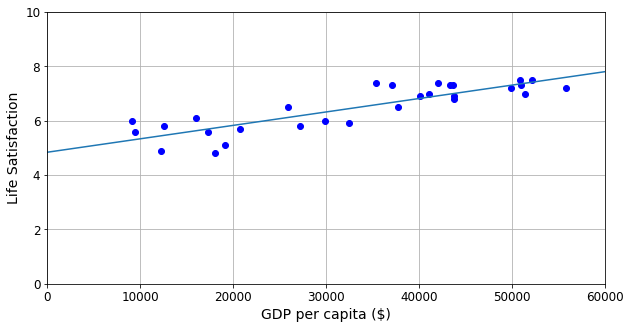

In [70]:
def plot_life_satisfaction_with_linear_model(X_train, y_train, w, b):
    plot_life_satisfaction(X_train, y_train)
    plt.plot([0, 60000], [b, w[0][0] * (60000 / 10000) + b])

plt.figure(figsize=(10, 5))
plot_life_satisfaction_with_linear_model(X_train, y_train, w_val, b_val)
plt.show()

# Using autodiff Instead

In [71]:
graph = tf.Graph()
with graph.as_default():
    X = tf.constant(X_train, dtype=tf.float32, name="X")
    y = tf.constant(y_train, dtype=tf.float32, name="y")

    b = tf.Variable(0.0, name="b")
    w = tf.Variable(tf.zeros([1, 1]), name="w")
    y_pred = tf.add(tf.matmul(X, w), b, name="y_pred")  # X @ w + b
    
    mse = tf.reduce_mean(tf.square(y_pred - y), name="mse")

    gradients_w, gradients_b = tf.gradients(mse, [w, b])  # <= IT'S AUTODIFF MAGIC!

    tweak_w_op = tf.assign(w, w - learning_rate * gradients_w)
    tweak_b_op = tf.assign(b, b - learning_rate * gradients_b)
    training_op = tf.group(tweak_w_op, tweak_b_op)

    init = tf.global_variables_initializer()

In [72]:
n_iterations = 2000

with tf.Session(graph=graph) as sess:
    init.run()
    for iteration in range(n_iterations):
        if iteration % 100 == 0:
            print("Iteration {:5}, MSE: {:.4f}".format(iteration, mse.eval()))
        training_op.run()
    w_val, b_val = sess.run([w, b])

Iteration     0, MSE: 42.8410
Iteration   100, MSE: 1.8935
Iteration   200, MSE: 1.1304
Iteration   300, MSE: 0.7073
Iteration   400, MSE: 0.4727
Iteration   500, MSE: 0.3426
Iteration   600, MSE: 0.2705
Iteration   700, MSE: 0.2305
Iteration   800, MSE: 0.2083
Iteration   900, MSE: 0.1960
Iteration  1000, MSE: 0.1892
Iteration  1100, MSE: 0.1855
Iteration  1200, MSE: 0.1834
Iteration  1300, MSE: 0.1822
Iteration  1400, MSE: 0.1816
Iteration  1500, MSE: 0.1812
Iteration  1600, MSE: 0.1810
Iteration  1700, MSE: 0.1809
Iteration  1800, MSE: 0.1808
Iteration  1900, MSE: 0.1808


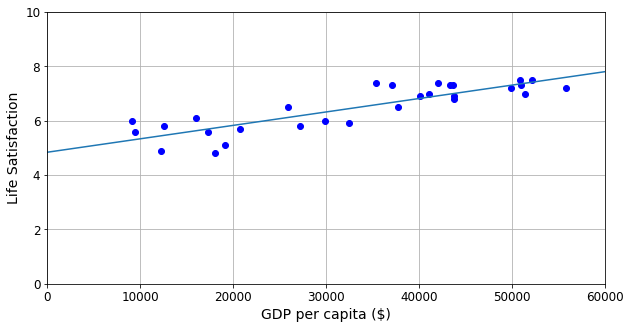

In [73]:
plt.figure(figsize=(10, 5))
plot_life_satisfaction_with_linear_model(X_train, y_train, w_val, b_val)
plt.show()

## Using Optimizers 

In [74]:
graph = tf.Graph()
with graph.as_default():
    X = tf.constant(X_train, dtype=tf.float32, name="X")
    y = tf.constant(y_train, dtype=tf.float32, name="y")

    b = tf.Variable(0.0, name="b")
    w = tf.Variable(tf.zeros([1, 1]), name="w")
    y_pred = tf.add(tf.matmul(X, w), b, name="y_pred")  # X @ w + b
    
    mse = tf.reduce_mean(tf.square(y_pred - y), name="mse")

    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(mse)  # <= MOAR AUTODIFF MAGIC!

    init = tf.global_variables_initializer()

In [75]:
n_iterations = 2000

with tf.Session(graph=graph) as sess:
    init.run()
    for iteration in range(n_iterations):
        if iteration % 100 == 0:
            print("Iteration {:5}, MSE: {:.4f}".format(iteration, mse.eval()))
        training_op.run()
    w_val, b_val = sess.run([w, b])

Iteration     0, MSE: 42.8410
Iteration   100, MSE: 1.8935
Iteration   200, MSE: 1.1304
Iteration   300, MSE: 0.7073
Iteration   400, MSE: 0.4727
Iteration   500, MSE: 0.3426
Iteration   600, MSE: 0.2705
Iteration   700, MSE: 0.2305
Iteration   800, MSE: 0.2083
Iteration   900, MSE: 0.1960
Iteration  1000, MSE: 0.1892
Iteration  1100, MSE: 0.1855
Iteration  1200, MSE: 0.1834
Iteration  1300, MSE: 0.1822
Iteration  1400, MSE: 0.1816
Iteration  1500, MSE: 0.1812
Iteration  1600, MSE: 0.1810
Iteration  1700, MSE: 0.1809
Iteration  1800, MSE: 0.1808
Iteration  1900, MSE: 0.1808


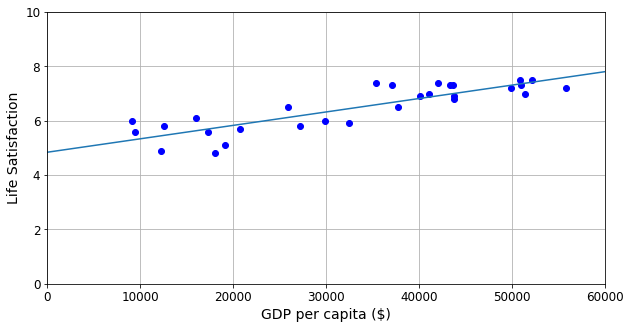

In [76]:
plt.figure(figsize=(10, 5))
plot_life_satisfaction_with_linear_model(X_train, y_train, w_val, b_val)
plt.show()

## Faster Optimizers

In [77]:
learning_rate = 0.01
momentum = 0.8

graph = tf.Graph()
with graph.as_default():
    X = tf.constant(X_train, dtype=tf.float32, name="X")
    y = tf.constant(y_train, dtype=tf.float32, name="y")

    b = tf.Variable(0.0, name="b")
    w = tf.Variable(tf.zeros([1, 1]), name="w")
    y_pred = tf.add(tf.matmul(X, w), b, name="y_pred")  # X @ w + b
    
    mse = tf.reduce_mean(tf.square(y_pred - y), name="mse")

    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
    training_op = optimizer.minimize(mse)

    init = tf.global_variables_initializer()

In [78]:
n_iterations = 500

with tf.Session(graph=graph) as sess:
    init.run()
    for iteration in range(n_iterations):
        if iteration % 100 == 0:
            print("Iteration {:5}, MSE: {:.4f}".format(iteration, mse.eval()))
        training_op.run()
    w_val, b_val = sess.run([w, b])

Iteration     0, MSE: 42.8410
Iteration   100, MSE: 0.3305
Iteration   200, MSE: 0.1870
Iteration   300, MSE: 0.1810
Iteration   400, MSE: 0.1808


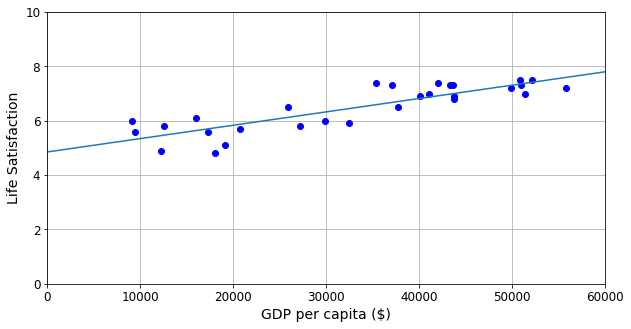

In [79]:
plt.figure(figsize=(10, 5))
plot_life_satisfaction_with_linear_model(X_train, y_train, w_val, b_val)
plt.show()

How does the optimizer know which variables to tweak? Answer: the `TRAINABLE_VARIABLES` collection.

In [80]:
coll = graph.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)
[var.op.name for var in coll]

['b', 'w']

## Making Predictions Outside of TensorFlow

In [81]:
cyprus_gdp_per_capita = 22000
cyprus_life_satisfaction = w_val[0][0] * cyprus_gdp_per_capita / 10000 + b_val
cyprus_life_satisfaction

5.9328389406204227

## Using placeholders 

In [82]:
graph = tf.Graph()
with graph.as_default():
    X = tf.placeholder(tf.float32, shape=[None, 1], name="X") # <= None allows for any
    y = tf.placeholder(tf.float32, shape=[None, 1], name="y") #    training batch size

    b = tf.Variable(0.0, name="b")
    w = tf.Variable(tf.zeros([1, 1]), name="w")
    y_pred = tf.add(tf.matmul(X, w), b, name="y_pred")  # X @ w + b
    
    mse = tf.reduce_mean(tf.square(y_pred - y), name="mse")

    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
    training_op = optimizer.minimize(mse)

    init = tf.global_variables_initializer()

In [83]:
n_iterations = 500

X_test = np.array([[22000]], dtype=np.float32) / 10000

with tf.Session(graph=graph) as sess:
    init.run()
    for iteration in range(n_iterations):
        feed_dict = {X: X_train, y: y_train}
        if iteration % 100 == 0:
            print("Iteration {:5}, MSE: {:.4f}".format(
                iteration, 
                mse.eval(feed_dict))) # <= FEED TRAINING DATA
        training_op.run(feed_dict)    # <= FEED TRAINING DATA
    # make the prediction:
    y_pred_val = y_pred.eval(feed_dict={X: X_test}) # <= FEED TEST DATA

Iteration     0, MSE: 42.8410
Iteration   100, MSE: 0.3305
Iteration   200, MSE: 0.1870
Iteration   300, MSE: 0.1810
Iteration   400, MSE: 0.1808


In [84]:
y_pred_val

array([[ 5.93283892]], dtype=float32)

## Exercise 5

![Exercise](https://c1.staticflickr.com/9/8101/8553474140_c50cf08708_b.jpg)

5.1) Create a simple graph that computes the function $f(x) = x^2 - 3x + 1$. Define $x$ as a placeholder for a simple scalar value of type float32 value (i.e., `shape=[], dtype=tf.float32`). Create a session and evaluate $f(5)$. You should find 11.0.

5.2) Add an operation that computes the derivative of $f(x)$ with regards to $x$, noted $f'(x)$. Create a session and evaluate $f'(5)$. You should find 7.0.

Hint: use `tf.gradients()`.

5.3) Using a `MomentumOptimizer`, find the value of $x$ that minimizes $f(x)$. You should find $\hat{x}=1.5$.

Hint: you need to change `x` into a `Variable`. Moreover, the `MomentumOptimizer` has its own variables that need to be initialized, so don't forget to create an `init` operation using a `tf.global_variables_initializer()`, and call it at the start of the session.

Try not to peek at the solution below before you have done the exercise! :)

![thinking](https://upload.wikimedia.org/wikipedia/commons/0/06/Filos_segundo_logo_%28flipped%29.jpg)

## Exercise 5 - Solution

5.1)

In [85]:
graph = tf.Graph()
with graph.as_default():
    x = tf.placeholder(tf.float32, shape=[], name="x")
    f = tf.square(x) - 3 * x + 1

In [86]:
with tf.Session(graph=graph):
    print(f.eval(feed_dict={x: 5.0}))

11.0


5.2)

In [87]:
with graph.as_default():
    [fp] = tf.gradients(f, [x])

In [88]:
with tf.Session(graph=graph):
    print(fp.eval(feed_dict={x: 5.0}))

7.0


5.3)

In [89]:
learning_rate = 0.01
momentum = 0.8

graph = tf.Graph()
with graph.as_default():
    x = tf.Variable(0.0, name="x")
    f = tf.square(x) - 3 * x + 1    
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
    training_op = optimizer.minimize(f)
    init = tf.global_variables_initializer()

In [90]:
n_iterations = 70
with tf.Session(graph=graph):
    init.run()
    for iteration in range(n_iterations):
        training_op.run()
        if iteration % 10 == 0:
            print("x={:.2f}, f(x)={:.2f}".format(x.eval(), f.eval()))

x=0.03, f(x)=0.91
x=0.90, f(x)=-0.89
x=1.44, f(x)=-1.25
x=1.54, f(x)=-1.25
x=1.52, f(x)=-1.25
x=1.50, f(x)=-1.25
x=1.50, f(x)=-1.25


Note that it's possible to replace the output value of any operation, not just placeholders. So, for example, even though `x` is now a `Variable`, you can use a `feed_dict` to use any value you want, for example to compute `f(5.0)`. **Important**: this does _not_ affect the variable!

In [91]:
with tf.Session(graph=graph):
    init.run()
    print(x.eval()) # x == 0.0
    print(f.eval()) # f(0) == 1.0
    print(f.eval(feed_dict={x: 5.0})) # use 5.0 instead of the value of x, to compute f(5)
    print(x.eval()) # x is still 0.0
    print(f.eval()) # f(0) is still 1.0

0.0
1.0
11.0
0.0
1.0


## Saving and Restoring a Model

In [92]:
graph = tf.Graph()
with graph.as_default():
    X = tf.placeholder(tf.float32, shape=[None, 1], name="X")
    y = tf.placeholder(tf.float32, shape=[None, 1], name="y")

    b = tf.Variable(0.0, name="b")
    w = tf.Variable(tf.zeros([1, 1]), name="w")
    y_pred = tf.add(tf.matmul(X, w), b, name="y_pred")  # X @ w + b
    
    mse = tf.reduce_mean(tf.square(y_pred - y), name="mse")

    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
    training_op = optimizer.minimize(mse)

    init = tf.global_variables_initializer()
    saver = tf.train.Saver() # <= At the very end of the construction phase

In [93]:
n_iterations = 500

with tf.Session(graph=graph) as sess:
    init.run()
    for iteration in range(n_iterations):
        if iteration % 100 == 0:
            print("Iteration {:5}, MSE: {:.4f}".format(
                iteration, 
                mse.eval(feed_dict={X: X_train, y: y_train})))
        training_op.run(feed_dict={X: X_train, y: y_train}) # <= FEED THE DICT
    saver.save(sess, "./my_life_satisfaction_model")

Iteration     0, MSE: 42.8410
Iteration   100, MSE: 0.3305
Iteration   200, MSE: 0.1870
Iteration   300, MSE: 0.1810
Iteration   400, MSE: 0.1808


In [94]:
with tf.Session(graph=graph) as sess:
    saver.restore(sess, "./my_life_satisfaction_model")
    # make the prediction:
    y_pred_val = y_pred.eval(feed_dict={X: X_test})

INFO:tensorflow:Restoring parameters from ./my_life_satisfaction_model


In [95]:
y_pred_val

array([[ 5.93283892]], dtype=float32)

## Restoring a Graph

In [96]:
model_path = "./my_life_satisfaction_model"
graph = tf.Graph()
with tf.Session(graph=graph) as sess:
    # restore the graph
    saver = tf.train.import_meta_graph(model_path + ".meta")
    saver.restore(sess, model_path)

    # get references to the tensors we need
    X = graph.get_tensor_by_name("X:0")
    y_pred = graph.get_tensor_by_name("y_pred:0")

    # make the prediction:
    y_pred_val = y_pred.eval(feed_dict={X: X_test})

INFO:tensorflow:Restoring parameters from ./my_life_satisfaction_model


In [97]:
y_pred_val

array([[ 5.93283892]], dtype=float32)

# Using Readers

In [98]:
filenames = ["data/life_satisfaction.csv"]
n_epochs = 500

graph = tf.Graph()
with graph.as_default():
    reader = tf.TextLineReader(skip_header_lines=1)

    filename_queue = tf.train.string_input_producer(filenames, num_epochs=n_epochs)
    record_id, record = reader.read(filename_queue)

    record_defaults = [[''], [0.0], [0.0]]
    country, gdp_per_capita, life_satisfaction = tf.decode_csv(record, record_defaults=record_defaults)

In [99]:
batch_size = 5
with graph.as_default():
    X_batch, y_batch = tf.train.batch([gdp_per_capita, life_satisfaction], batch_size=batch_size)
    X_batch_reshaped = tf.reshape(X_batch, [-1, 1])
    y_batch_reshaped = tf.reshape(y_batch, [-1, 1])

In [100]:
with graph.as_default():
    X = tf.placeholder_with_default(X_batch_reshaped, shape=[None, 1], name="X")
    y = tf.placeholder_with_default(y_batch_reshaped, shape=[None, 1], name="y")

    b = tf.Variable(0.0, name="b")
    w = tf.Variable(tf.zeros([1, 1]), name="w")
    y_pred = tf.add(tf.matmul(X / 10000, w), b, name="y_pred")  # X @ w + b
    
    mse = tf.reduce_mean(tf.square(y_pred - y), name="mse")

    global_step = tf.Variable(0, trainable=False, name='global_step')
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
    training_op = optimizer.minimize(mse, global_step=global_step)

    init = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    saver = tf.train.Saver()

In [101]:
with tf.Session(graph=graph) as sess:
    init.run()
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    try:
        while not coord.should_stop():
            _, mse_val, global_step_val = sess.run([training_op, mse, global_step])
            if global_step_val % 100 == 0:
                print(global_step_val, mse_val)
    except tf.errors.OutOfRangeError:
        print("End of training")
    coord.request_stop()
    coord.join(threads)
    saver.save(sess, "./my_life_satisfaction_model")

100 0.310594
200 0.418606
300 0.0379469
400 0.0433003
500 0.142837
600 0.150865
700 0.113731
800 0.0544016
900 0.238013
1000 0.183196
1100 0.156038
1200 0.0214089
1300 0.245098
1400 0.346948
1500 0.28669
1600 0.0353459
1700 0.219129
1800 0.311163
1900 0.312836
2000 0.0508124
2100 0.199358
2200 0.353766
2300 0.314068
2400 0.119995
2500 0.186974
2600 0.352072
2700 0.331966
2800 0.141878
2900 0.0863109
End of training


# TensorBoard

## Exercise 6

![Exercise](https://c1.staticflickr.com/9/8101/8553474140_c50cf08708_b.jpg)

In this exercise, you will learn to use TensorBoard. It is a great visualization tool that comes with TensorFlow. It works by parsing special TensorFlow logs, called _summaries_, and displaying them nicely.

6.1) Starting the TensorBoard server. Open a Terminal and type the following commands.

Move to the `tensorflow-safari-course` directory:

`~$` **`cd tensorflow-safari-course`**

Create the `tf_logs` directory that will hold the TensorFlow data that we will want TensorBoard to display:

`~/tensorflow-safari-course$` **`mkdir tf_logs`**

Activate the virtual environment:

`~/tensorflow-safari-course$` **`source env/bin/activate`**

Start the TensorBoard server:

`(env) ~/tensorflow-safari-course$` **`tensorboard --logdir=tf_logs`**

`Starting TensorBoard b'41' on port 6006
(You can navigate to` http://127.0.1.1:6006 `)`

Now visit the URL given by TensorBoard. You should see the TensorBoard interface.

6.2) Now create a `tf.summary.FileWriter`, with the parameters: `logdir="tf_logs/run_number_1/"` and `graph=graph` where `graph` is the one we built just before this exercise. This will automatically:
* create the `run_number_1` directory inside the `tf_logs` directory,
* create an `events.out.tfevents.*` file in that subdirectory that will contain the data that TensorBoard will display,
* write the graph's definition to this file.

Next, try refreshing the TensorBoard page in your browser (you may need to wait a couple minutes for it to detect the change, or else you can just restart the TensorBoard server). Visit the Graph tab: you should be able to visualize the graph.

6.3) As you can see, the graph looks really messy in TensorBoard. We need to organize it a bit. For this, name scopes come in handy. An operation can be placed inside a name scope in one of two ways:

* Add the scope as a prefix to the operation's name, for example:

```python
a = tf.constant(0.0, name="my_name_scope/a")
```

* Or (generally clearer) use a `tf.name_scope()` block, for example:

```python
with tf.name_scope("my_name_scope"):
    a = tf.constant(0.0, name="a")
```

Add name scopes to the following graph, then write it to TensorBoard (using a different run number for the log directory name) and see how much better it looks, and how much easier it is to explore.

In [102]:
filenames = ["data/life_satisfaction.csv"]
n_epochs = 500
batch_size = 5

graph = tf.Graph()
with graph.as_default():
    reader = tf.TextLineReader(skip_header_lines=1)

    filename_queue = tf.train.string_input_producer(filenames, num_epochs=n_epochs)
    record_id, record = reader.read(filename_queue)

    record_defaults = [[''], [0.0], [0.0]]
    country, gdp_per_capita, life_satisfaction = tf.decode_csv(record, record_defaults=record_defaults)

    X_batch, y_batch = tf.train.batch([gdp_per_capita, life_satisfaction], batch_size=batch_size)
    X_batch_reshaped = tf.reshape(X_batch, [-1, 1])
    y_batch_reshaped = tf.reshape(y_batch, [-1, 1])

    X = tf.placeholder_with_default(X_batch_reshaped, shape=[None, 1], name="X")
    y = tf.placeholder_with_default(y_batch_reshaped, shape=[None, 1], name="y")

    b = tf.Variable(0.0, name="b")
    w = tf.Variable(tf.zeros([1, 1]), name="w")
    y_pred = tf.add(tf.matmul(X / 10000, w), b, name="y_pred")  # X @ w + b
    
    mse = tf.reduce_mean(tf.square(y_pred - y), name="mse")
    global_step = tf.Variable(0, trainable=False, name='global_step')
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
    training_op = optimizer.minimize(mse, global_step=global_step)
        
    init = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    saver = tf.train.Saver()

6.4) Print out the name of a few operations. Notice how the names now have the scope as a prefix.

6.5) TensorBoard is capable of displaying data from multiple TensorFlow runs (for example multiple training sessions). For this, we need to place the data from each run in a different subdirectory of the `tf_logs` directory. We can name these subdirectories however we want, but a simple option is to name them using a timestamp. The following `logdir()` function returns the path of a subdirectory whose name is based on the current date and time:

In [103]:
from datetime import datetime

def logdir():
    root_logdir = "tf_logs"
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    return "{}/run_{}/".format(root_logdir, now)

In [104]:
logdir()

'tf_logs/run_20170627141713/'

Create a few different graphs and instantiate a different FileWriter for each one, using a different log directory every time (with the help of the `logdir()` function). Refresh TensorBoard and notice that you can browse any graph you want by selecting the appropriate run.

6.6) Now we will use TensorBoard to visualize the learning curve, that is the evolution of the cost function during training.

* First add a scalar summary operation in the graph, using `tf.summary.scalar("MSE", mse)`.
* Next, update the training code to evaluate this scalar summary and write the result to the events file using the `FileWriter`'s `add_summary()` method (also specifying the training step). For performance reasons, you probably want to do this only every 10 training iterations or so.
* Next, train the model.
* Refresh TensorBoard, and visit the Scalars tab. Select the appropriate run and visualize the learning curve. Try zooming in and out, and play around with the options, in particular the smoothing option.

Try not to peek at the solution below before you have done the exercise! :)

![thinking](https://upload.wikimedia.org/wikipedia/commons/0/06/Filos_segundo_logo_%28flipped%29.jpg)

## Exercise 6 - Solution
6.1)

N/A

6.2)

In [105]:
summary_writer = tf.summary.FileWriter("tf_logs/run_number_1_solution/", graph=graph)

6.3)

In [106]:
filenames = ["data/life_satisfaction.csv"]
n_epochs = 500
batch_size = 5

graph = tf.Graph()
with graph.as_default():
    with tf.name_scope("reader"):
        reader = tf.TextLineReader(skip_header_lines=1)

        filename_queue = tf.train.string_input_producer(filenames, num_epochs=n_epochs)
        record_id, record = reader.read(filename_queue)

        record_defaults = [[''], [0.0], [0.0]]
        country, gdp_per_capita, life_satisfaction = tf.decode_csv(record, record_defaults=record_defaults)

        X_batch, y_batch = tf.train.batch([gdp_per_capita, life_satisfaction], batch_size=batch_size)
        X_batch_reshaped = tf.reshape(X_batch, [-1, 1])
        y_batch_reshaped = tf.reshape(y_batch, [-1, 1])

    with tf.name_scope("linear_model"):
        X = tf.placeholder_with_default(X_batch_reshaped, shape=[None, 1], name="X")
        y = tf.placeholder_with_default(y_batch_reshaped, shape=[None, 1], name="y")

        b = tf.Variable(0.0, name="b")
        w = tf.Variable(tf.zeros([1, 1]), name="w")
        y_pred = tf.add(tf.matmul(X / 10000, w), b, name="y_pred")  # X @ w + b
    
    with tf.name_scope("train"):
        mse = tf.reduce_mean(tf.square(y_pred - y), name="mse")
        global_step = tf.Variable(0, trainable=False, name='global_step')
        optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
        training_op = optimizer.minimize(mse, global_step=global_step)
        
    init = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    saver = tf.train.Saver()

In [107]:
summary_writer = tf.summary.FileWriter("tf_logs/run_number_2_solution/", graph=graph)

6.4)

In [108]:
country.name, gdp_per_capita.name, X_batch.name, y_batch.name

('reader/DecodeCSV:0',
 'reader/DecodeCSV:1',
 'reader/batch:0',
 'reader/batch:1')

In [109]:
X.name, y.name, b.name, w.name, y_pred.name

('linear_model/X:0',
 'linear_model/y:0',
 'linear_model/b:0',
 'linear_model/w:0',
 'linear_model/y_pred:0')

In [110]:
mse.name, global_step.name, training_op.name

('train/mse:0', 'train/global_step:0', 'train/Momentum')

6.5)

In [111]:
graph1 = tf.Graph()
with graph1.as_default():
    a = tf.constant(1.0)

In [112]:
summary_writer = tf.summary.FileWriter(logdir(), graph=graph)

In [113]:
graph2 = tf.Graph()
with graph2.as_default():
    a = tf.constant(1.0, name="a")
    b = tf.Variable(2.0, name="b")
    c = a * b

If we run `logdir()` twice within the same second, we will get the same directory name twice. To avoid this, let's wait a bit over 1 second here. In real life, this is quite unlikely to happen since training a model typically takes much longer than 1 second.

In [114]:
import time
time.sleep(1.1)

In [115]:
summary_writer = tf.summary.FileWriter(logdir(), graph=graph)

In [116]:
time.sleep(1.1)

6.6)

In [117]:
filenames = ["data/life_satisfaction.csv"]
n_epochs = 500
batch_size = 5

graph = tf.Graph()
with graph.as_default():
    with tf.name_scope("reader"):
        reader = tf.TextLineReader(skip_header_lines=1)

        filename_queue = tf.train.string_input_producer(filenames, num_epochs=n_epochs)
        record_id, record = reader.read(filename_queue)

        record_defaults = [[''], [0.0], [0.0]]
        country, gdp_per_capita, life_satisfaction = tf.decode_csv(record, record_defaults=record_defaults)

        X_batch, y_batch = tf.train.batch([gdp_per_capita, life_satisfaction], batch_size=batch_size)
        X_batch_reshaped = tf.reshape(X_batch, [-1, 1])
        y_batch_reshaped = tf.reshape(y_batch, [-1, 1])

    with tf.name_scope("linear_model"):
        X = tf.placeholder_with_default(X_batch_reshaped, shape=[None, 1], name="X")
        y = tf.placeholder_with_default(y_batch_reshaped, shape=[None, 1], name="y")

        b = tf.Variable(0.0, name="b")
        w = tf.Variable(tf.zeros([1, 1]), name="w")
        y_pred = tf.add(tf.matmul(X / 10000, w), b, name="y_pred")
    
    with tf.name_scope("train"):
        mse = tf.reduce_mean(tf.square(y_pred - y), name="mse")
        mse_summary = tf.summary.scalar('MSE', mse)                     # <= ADDED
        global_step = tf.Variable(0, trainable=False, name='global_step')
        optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
        training_op = optimizer.minimize(mse, global_step=global_step)
        
    init = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    saver = tf.train.Saver()

In [118]:
summary_writer = tf.summary.FileWriter(logdir(), graph)

In [119]:
with tf.Session(graph=graph) as sess:
    init.run()
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    try:
        while not coord.should_stop():
            _, mse_summary_val, global_step_val = sess.run([training_op, mse_summary, global_step])
            if global_step_val % 10 == 0:
                summary_writer.add_summary(mse_summary_val, global_step_val)
    except tf.errors.OutOfRangeError:
        print("End of training")
    coord.request_stop()
    coord.join(threads)
    saver.save(sess, "./my_life_satisfaction_model")

End of training


# Artificial Neural Networks

## Exercise 7

![Exercise](https://c1.staticflickr.com/9/8101/8553474140_c50cf08708_b.jpg)

Visit the [TensorFlow Playground](http://playground.tensorflow.org).
* Try training the default neural network by clicking the "Run" button (top left). Notice how it quickly finds a good solution for the classification task. Notice that the neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple patterns of the first hidden layer into more complex patterns). In general, the more layers, the more complex the patterns can be.
* Try replacing the Tanh activation function with the ReLU activation function, and train the network again. Notice that it finds a solution even faster, but this time the boundaries are linear. This is due to the shape of the ReLU function.
* Modify the network architecture to have just one hidden layer with three neurons. Train it multiple times (to reset the network weights, just add and remove a neuron). Notice that the training time varies a lot, and sometimes it even gets stuck in a local minimum.
* Now remove one neuron to keep just 2. Notice that the neural network is now incapable of finding a good solution, even if you try multiple times. The model has too few parameters and it systematically underfits the training set.
* Next, set the number of neurons to 8 and train the network several times. Notice that it is now consistently fast and never gets stuck. This highlights an important finding in neural network theory: large neural networks almost never get stuck in local minima, and even when they do these local optima are almost as good as the global optimum. However, they can still get stuck on long plateaus for a long time.
* Now change the dataset to be the spiral (bottom right dataset under "DATA"). Change the network architecture to have 4 hidden layers with 8 neurons each. Notice that training takes much longer, and often gets stuck on plateaus for long periods of time. Also notice that the neurons in the highest layers (i.e. on the right) tend to evolve faster than the neurons in the lowest layers (i.e. on the left). This problem, called the "vanishing gradients" problem, can be alleviated using better weight initialization and other techniques, better optimizers (such as AdaGrad or Adam), or using Batch Normalization.
* Go ahead and play with the other parameters to get a feel of what they do.

## Load the MNIST dataset

In [120]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [121]:
batch_size = 3
X_batch, y_batch = mnist.train.next_batch(batch_size)
X_batch.shape

(3, 784)

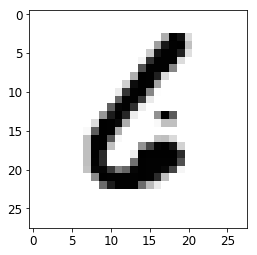

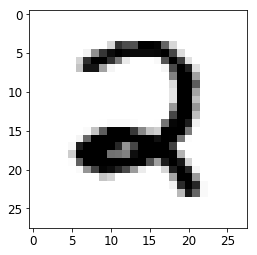

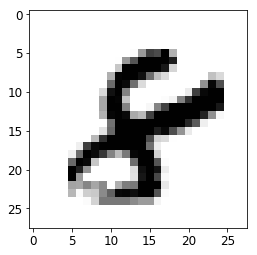

In [122]:
for image_data in X_batch:
    plt.imshow(image_data.reshape([28, 28]), cmap="binary", interpolation="nearest")
    plt.show()

In [123]:
y_batch

array([6, 2, 8], dtype=uint8)

## Exercise 8

![Exercise](https://c1.staticflickr.com/9/8101/8553474140_c50cf08708_b.jpg)

8.1) Take a close look at the following neural network model and make sure you understand every line. Next, add an extra hidden layer composed of 100 neurons.

In [124]:
n_inputs = 28 * 28
n_hidden1 = 100
n_outputs = 10

graph = tf.Graph()
with graph.as_default():
    with tf.name_scope("inputs"):
        X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
        y = tf.placeholder(tf.int32, shape=[None], name="y")

    with tf.name_scope("hidden1"):
        b1 = tf.Variable(tf.zeros([n_hidden1]), name="b1")
        W1 = tf.Variable(tf.random_uniform([n_inputs, n_hidden1], -1.0, 1.0, seed=42), name="W1")
        hidden1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    
    with tf.name_scope("output"):
        b2 = tf.Variable(tf.zeros([n_outputs]), name="b2")
        W2 = tf.Variable(tf.random_uniform([n_hidden1, n_outputs], -1.0, 1.0, seed=42), name="W2")
        logits = tf.matmul(hidden1, W2) + b2
        Y_proba = tf.nn.softmax(logits, name="Y_proba")
    
    with tf.name_scope("train"):
        xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
        loss = tf.reduce_mean(xentropy)
        optimizer = tf.train.AdamOptimizer()
        training_op = optimizer.minimize(loss)

    with tf.name_scope("eval"):
        correct = tf.nn.in_top_k(logits, y, 1)
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

    with tf.name_scope("init_and_save"):
        init = tf.global_variables_initializer()
        saver = tf.train.Saver()

8.2) Write the training code, and train the model for about 20 epochs (i.e. enough training iterations to go through the training set 20 times). Evaluate it on the test set: you should get over 95% accuracy.

Hint: you should open a session, initialize the variables, then write the main training loop. Inside it you should use `minst.train.next_batch(batch_size)` to get the next training batch (say with `batch_size=50`), then run the `training_op`, feeding it the training batch (don't forget to feed both `X` and `y`). Every few hundred iterations, evaluate the model's accuracy on the test set (`mnist.test.images` and `mnist.test.labels`), and print the result. At the end of training, save the model.

8.3) Bonus question: load the model you just trained and saved, and use it to make predictions on the first 200 images of the test set. Display the images that the model got wrong, and show the class probabilities that it guessed. Notice that some of the images it gets wrong are pretty poorly written, but some are obvious to us humans. We will see that Convolutional Neural Networks can do a much better job and reach human performance.

Try not to peek at the solution below before you have done the exercise! :)

![thinking](https://upload.wikimedia.org/wikipedia/commons/0/06/Filos_segundo_logo_%28flipped%29.jpg)

## Exercise 8 - Solution

8.1)

In [125]:
n_inputs = 28 * 28
n_hidden1 = 100
n_hidden2 = 100
n_outputs = 10

graph = tf.Graph()
with graph.as_default():
    with tf.name_scope("inputs"):
        X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
        y = tf.placeholder(tf.int32, shape=[None], name="y")

    with tf.name_scope("hidden1"):
        b1 = tf.Variable(tf.zeros([n_hidden1]), name="b1")
        W1 = tf.Variable(tf.random_uniform([n_inputs, n_hidden1], -1.0, 1.0, seed=42), name="W1")
        hidden1 = tf.nn.relu(tf.matmul(X, W1) + b1)

    with tf.name_scope("hidden2"):
        b2 = tf.Variable(tf.zeros([n_hidden2]), name="b2")
        W2 = tf.Variable(tf.random_uniform([n_hidden1, n_hidden2], -1.0, 1.0, seed=42), name="W2")
        hidden2 = tf.nn.relu(tf.matmul(hidden1, W2) + b2)

    with tf.name_scope("output"):
        b3 = tf.Variable(tf.zeros([n_outputs]), name="b3")
        W3 = tf.Variable(tf.random_uniform([n_hidden2, n_outputs], -1.0, 1.0, seed=42), name="W3")
        logits = tf.matmul(hidden2, W3) + b3
        Y_proba = tf.nn.softmax(logits, name="Y_proba")
    
    with tf.name_scope("train"):
        xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
        loss = tf.reduce_mean(xentropy)
        optimizer = tf.train.AdamOptimizer()
        training_op = optimizer.minimize(loss)

    with tf.name_scope("eval"):
        correct = tf.nn.in_top_k(logits, y, 1)
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

    with tf.name_scope("init_and_save"):
        init = tf.global_variables_initializer()
        saver = tf.train.Saver()

8.2)

In [126]:
n_epochs = 20
batch_size = 50

with tf.Session(graph=graph) as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_mnist_model")

0 Train accuracy: 0.86 Test accuracy: 0.8681
1 Train accuracy: 0.92 Test accuracy: 0.8926
2 Train accuracy: 0.84 Test accuracy: 0.9074
3 Train accuracy: 0.88 Test accuracy: 0.9202
4 Train accuracy: 0.98 Test accuracy: 0.9272
5 Train accuracy: 0.98 Test accuracy: 0.9297
6 Train accuracy: 1.0 Test accuracy: 0.9329
7 Train accuracy: 0.96 Test accuracy: 0.9385
8 Train accuracy: 0.94 Test accuracy: 0.9355
9 Train accuracy: 1.0 Test accuracy: 0.9415
10 Train accuracy: 0.98 Test accuracy: 0.9401
11 Train accuracy: 0.98 Test accuracy: 0.9393
12 Train accuracy: 0.98 Test accuracy: 0.9462
13 Train accuracy: 0.98 Test accuracy: 0.9448
14 Train accuracy: 0.98 Test accuracy: 0.9478
15 Train accuracy: 0.96 Test accuracy: 0.9507
16 Train accuracy: 1.0 Test accuracy: 0.9484
17 Train accuracy: 1.0 Test accuracy: 0.9521
18 Train accuracy: 0.98 Test accuracy: 0.9521
19 Train accuracy: 1.0 Test accuracy: 0.9526


8.3)

In [127]:
graph = tf.Graph()
with tf.Session(graph=graph) as sess:
    saver = tf.train.import_meta_graph("./my_mnist_model.meta")
    saver.restore(sess, "./my_mnist_model")
    X = graph.get_tensor_by_name("inputs/X:0")
    Y_proba = graph.get_tensor_by_name("output/Y_proba:0")
    Y_proba_val = Y_proba.eval(feed_dict={X: mnist.test.images})

INFO:tensorflow:Restoring parameters from ./my_mnist_model


Actual class:3, Predicted class: 5, Main probabilities: 5:98.0%, 8:1.9%


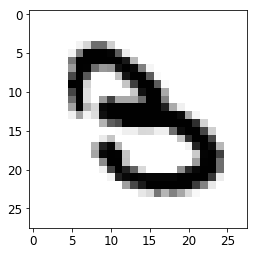

Actual class:9, Predicted class: 7, Main probabilities: 7:80.4%, 9:19.5%


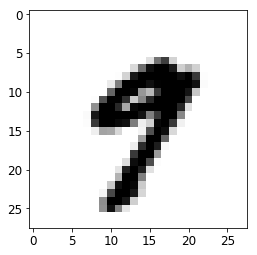

Actual class:4, Predicted class: 0, Main probabilities: 0:100.0%


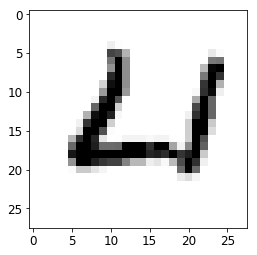

Actual class:5, Predicted class: 9, Main probabilities: 9:100.0%


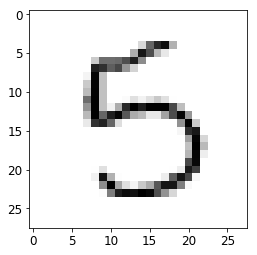

Actual class:2, Predicted class: 8, Main probabilities: 2:4.9%, 8:95.1%


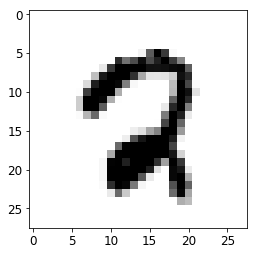

Actual class:2, Predicted class: 9, Main probabilities: 9:100.0%


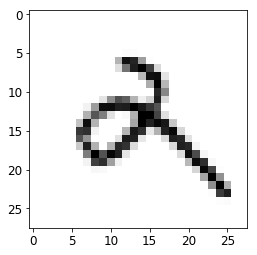

Actual class:9, Predicted class: 8, Main probabilities: 8:99.7%


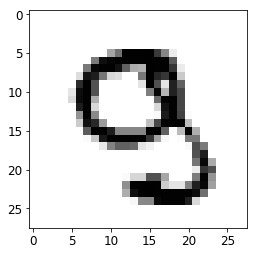

In [128]:
for example_index in range(200):
    y_proba = Y_proba_val[example_index]
    y_pred = np.argmax(y_proba)
    y_label = mnist.test.labels[example_index]
    if y_pred != y_label:
        print("Actual class:{}, Predicted class: {}, Main probabilities: {}".format(
                  y_label,
                  y_pred,
                  ", ".join(["{}:{:.1f}%".format(n, 100*p)
                             for n, p in enumerate(y_proba) if p > 0.01])))
        plt.imshow(mnist.test.images[example_index].reshape([28, 28]), cmap="binary", interpolation="nearest")
        plt.show()


# Organizing Your Code

In [129]:
def neural_net_layer(inputs, n_neurons, activation=None, seed=None):
    n_inputs = int(inputs.get_shape()[1])
    b = tf.Variable(tf.zeros([n_neurons]), name="b")
    W = tf.Variable(tf.random_uniform([n_inputs, n_neurons], -1.0, 1.0, seed=seed), name="W")
    logits = tf.matmul(inputs, W) + b
    if activation:
        return activation(logits)
    else:
        return logits

Let's simplify our code by using `neural_net_layer()`:

In [130]:
n_inputs = 28 * 28
n_hidden1 = 100
n_outputs = 10

graph = tf.Graph()
with graph.as_default():
    with tf.name_scope("inputs"):
        X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
        y = tf.placeholder(tf.int32, shape=[None], name="y")

#########################################################################
# This section is simplified (the rest is unchanged)
#
    with tf.name_scope("hidden1"):
        hidden1 = neural_net_layer(X, n_hidden1, activation=tf.nn.relu) # <= CHANGED

    with tf.name_scope("output"):
        logits = neural_net_layer(hidden1, n_outputs)                   # <= CHANGED
        Y_proba = tf.nn.softmax(logits, name="Y_proba")
#
#
#########################################################################
    
    with tf.name_scope("train"):
        xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
        loss = tf.reduce_mean(xentropy)
        optimizer = tf.train.AdamOptimizer()
        training_op = optimizer.minimize(loss)

    with tf.name_scope("eval"):
        correct = tf.nn.in_top_k(logits, y, 1)
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

    with tf.name_scope("init_and_save"):
        init = tf.global_variables_initializer()
        saver = tf.train.Saver()

In [131]:
[var.op.name for var in graph.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)]

['hidden1/b', 'hidden1/W', 'output/b', 'output/W']

Let's check that training still works:

In [132]:
n_epochs = 20
batch_size = 50

with tf.Session(graph=graph) as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_mnist_model")

0 Train accuracy: 0.84 Test accuracy: 0.8694
1 Train accuracy: 0.94 Test accuracy: 0.9029
2 Train accuracy: 0.9 Test accuracy: 0.92
3 Train accuracy: 0.96 Test accuracy: 0.9283
4 Train accuracy: 0.92 Test accuracy: 0.9353
5 Train accuracy: 0.96 Test accuracy: 0.9415
6 Train accuracy: 1.0 Test accuracy: 0.945
7 Train accuracy: 0.98 Test accuracy: 0.9456
8 Train accuracy: 0.98 Test accuracy: 0.9508
9 Train accuracy: 1.0 Test accuracy: 0.9512
10 Train accuracy: 1.0 Test accuracy: 0.9548
11 Train accuracy: 0.94 Test accuracy: 0.9556
12 Train accuracy: 0.96 Test accuracy: 0.9567
13 Train accuracy: 0.98 Test accuracy: 0.9553
14 Train accuracy: 1.0 Test accuracy: 0.9582
15 Train accuracy: 1.0 Test accuracy: 0.9582
16 Train accuracy: 1.0 Test accuracy: 0.9591
17 Train accuracy: 1.0 Test accuracy: 0.9602
18 Train accuracy: 1.0 Test accuracy: 0.9614
19 Train accuracy: 0.98 Test accuracy: 0.9606


Now let's use `tf.layers.dense()` instead:

In [133]:
n_inputs = 28 * 28
n_hidden1 = 100
n_outputs = 10

graph = tf.Graph()
with graph.as_default():
    with tf.name_scope("inputs"):
        X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
        y = tf.placeholder(tf.int32, shape=[None], name="y")

    with tf.name_scope("hidden1"):
        hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1") # <= CHANGED

    with tf.name_scope("output"):
        logits = tf.layers.dense(hidden1, n_outputs, name="output")                    # <= CHANGED
        Y_proba = tf.nn.softmax(logits)
    
    with tf.name_scope("train"):
        xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
        loss = tf.reduce_mean(xentropy)
        optimizer = tf.train.AdamOptimizer()
        training_op = optimizer.minimize(loss)

    with tf.name_scope("eval"):
        correct = tf.nn.in_top_k(logits, y, 1)
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

    with tf.name_scope("init_and_save"):
        init = tf.global_variables_initializer()
        saver = tf.train.Saver()

In [134]:
[var.op.name for var in graph.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)]

['hidden1/kernel', 'hidden1/bias', 'output/kernel', 'output/bias']

Let's check that training still works:

In [135]:
n_epochs = 20
batch_size = 50

with tf.Session(graph=graph) as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_mnist_model")

0 Train accuracy: 1.0 Test accuracy: 0.954
1 Train accuracy: 0.96 Test accuracy: 0.9628
2 Train accuracy: 0.94 Test accuracy: 0.9677
3 Train accuracy: 0.94 Test accuracy: 0.9735
4 Train accuracy: 0.98 Test accuracy: 0.9725
5 Train accuracy: 1.0 Test accuracy: 0.9762
6 Train accuracy: 0.98 Test accuracy: 0.9762
7 Train accuracy: 1.0 Test accuracy: 0.9772
8 Train accuracy: 1.0 Test accuracy: 0.976
9 Train accuracy: 0.98 Test accuracy: 0.9756
10 Train accuracy: 1.0 Test accuracy: 0.9759
11 Train accuracy: 1.0 Test accuracy: 0.9783
12 Train accuracy: 1.0 Test accuracy: 0.9782
13 Train accuracy: 1.0 Test accuracy: 0.9778
14 Train accuracy: 1.0 Test accuracy: 0.9773
15 Train accuracy: 1.0 Test accuracy: 0.976
16 Train accuracy: 1.0 Test accuracy: 0.9766
17 Train accuracy: 1.0 Test accuracy: 0.9769
18 Train accuracy: 1.0 Test accuracy: 0.9775
19 Train accuracy: 1.0 Test accuracy: 0.979


Now suppose you want two more hidden layers with shared weights & biases. Let's use variable scopes for this:

In [136]:
n_inputs = 28 * 28
n_hidden = 100
n_outputs = 10

graph = tf.Graph()
with graph.as_default():
    with tf.name_scope("inputs"):
        X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
        y = tf.placeholder(tf.int32, shape=[None], name="y")

    hidden1 = tf.layers.dense(X, n_hidden, activation=tf.nn.relu, name="hidden1")                    # <= CHANGED
    hidden2 = tf.layers.dense(hidden1, n_hidden, activation=tf.nn.relu, name="hidden23")             # <= CHANGED
    hidden3 = tf.layers.dense(hidden2, n_hidden, activation=tf.nn.relu, name="hidden23", reuse=True) # <= CHANGED

    with tf.name_scope("output"):
        logits = tf.layers.dense(hidden3, n_outputs, name="output")
        Y_proba = tf.nn.softmax(logits, name="Y_proba")
    
    with tf.name_scope("train"):
        xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
        loss = tf.reduce_mean(xentropy)
        optimizer = tf.train.AdamOptimizer()
        training_op = optimizer.minimize(loss)

    with tf.name_scope("eval"):
        correct = tf.nn.in_top_k(logits, y, 1)
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

    with tf.name_scope("init_and_save"):
        init = tf.global_variables_initializer()
        saver = tf.train.Saver()

In [137]:
[var.op.name for var in graph.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)]

['hidden1/kernel',
 'hidden1/bias',
 'hidden23/kernel',
 'hidden23/bias',
 'output/kernel',
 'output/bias']

Check that training works well:

In [138]:
n_epochs = 20
batch_size = 50

with tf.Session(graph=graph) as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_mnist_model")

0 Train accuracy: 0.98 Test accuracy: 0.9594
1 Train accuracy: 0.98 Test accuracy: 0.9667
2 Train accuracy: 1.0 Test accuracy: 0.9702
3 Train accuracy: 0.98 Test accuracy: 0.9737
4 Train accuracy: 1.0 Test accuracy: 0.9752
5 Train accuracy: 1.0 Test accuracy: 0.9767
6 Train accuracy: 1.0 Test accuracy: 0.9768
7 Train accuracy: 0.98 Test accuracy: 0.9797
8 Train accuracy: 1.0 Test accuracy: 0.9772
9 Train accuracy: 1.0 Test accuracy: 0.9752
10 Train accuracy: 1.0 Test accuracy: 0.9738
11 Train accuracy: 0.98 Test accuracy: 0.9777
12 Train accuracy: 0.98 Test accuracy: 0.9793
13 Train accuracy: 1.0 Test accuracy: 0.9727
14 Train accuracy: 0.98 Test accuracy: 0.9762
15 Train accuracy: 1.0 Test accuracy: 0.9784
16 Train accuracy: 1.0 Test accuracy: 0.9737
17 Train accuracy: 1.0 Test accuracy: 0.9794
18 Train accuracy: 1.0 Test accuracy: 0.9767
19 Train accuracy: 1.0 Test accuracy: 0.9776


How would we implement variable sharing in `neural_net_layer()`?

In [139]:
def neural_net_layer(inputs, n_neurons, activation=None, name=None, reuse=None, seed=None):
    with tf.variable_scope(name, default_name="layer", reuse=reuse):
        n_inputs = int(inputs.get_shape()[1])
        rnd_init = lambda shape, dtype, partition_info: tf.random_uniform(shape, -1.0, 1.0, dtype=dtype, seed=seed)
        b = tf.get_variable("biases", shape=[n_neurons], initializer=rnd_init)
        W = tf.get_variable("weights", shape=[n_inputs, n_neurons], initializer=rnd_init)
        logits = tf.matmul(inputs, W) + b
        if activation:
            return activation(logits)
        else:
            return logits

In [140]:
graph = tf.Graph()
with graph.as_default():
    with tf.variable_scope("foo"): 
        a = tf.constant(1., name="a")
        with tf.name_scope("bar"): 
            b = tf.constant(2., name="b")
            with tf.name_scope("baz"):
                c = tf.get_variable("c", shape=[], initializer=tf.constant_initializer(2))
                s = tf.add_n([a,b,c], name="s")

In [141]:
a.name

'foo/a:0'

In [142]:
b.name

'foo/bar/b:0'

In [143]:
c.name

'foo/c:0'

In [144]:
s.name

'foo/bar/baz/s:0'

# Techniques for Training Deep Nets

Using He initialization and the ELU activation function (with the help of a `partial()`):

In [145]:
from functools import partial

n_inputs = 28 * 28
n_hidden1 = 100
n_hidden2 = 100
n_outputs = 10

graph = tf.Graph()
with graph.as_default():
    with tf.name_scope("inputs"):
        X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
        y = tf.placeholder(tf.int32, shape=[None], name="y")

    he_init = tf.contrib.layers.variance_scaling_initializer()
    
    dense_layer = partial(tf.layers.dense,
                          kernel_initializer=he_init,
                          activation=tf.nn.elu)
    hidden1 = dense_layer(X, n_hidden1, name="hidden1")
    hidden2 = dense_layer(hidden1, n_hidden2, name="hidden2")
    logits = dense_layer(hidden2, n_outputs, activation=None, name="output")
    Y_proba = tf.nn.softmax(logits)
    
    with tf.name_scope("train"):
        xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
        loss = tf.reduce_mean(xentropy)
        optimizer = tf.train.AdamOptimizer()
        training_op = optimizer.minimize(loss)

    with tf.name_scope("eval"):
        correct = tf.nn.in_top_k(logits, y, 1)
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

    with tf.name_scope("init_and_save"):
        init = tf.global_variables_initializer()
        saver = tf.train.Saver()

In [146]:
n_epochs = 20
batch_size = 50

with tf.Session(graph=graph) as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_mnist_model")

0 Train accuracy: 0.94 Test accuracy: 0.9487
1 Train accuracy: 0.98 Test accuracy: 0.9625
2 Train accuracy: 1.0 Test accuracy: 0.9713
3 Train accuracy: 0.96 Test accuracy: 0.9676
4 Train accuracy: 0.96 Test accuracy: 0.9736
5 Train accuracy: 0.98 Test accuracy: 0.9769
6 Train accuracy: 1.0 Test accuracy: 0.9755
7 Train accuracy: 1.0 Test accuracy: 0.9727
8 Train accuracy: 1.0 Test accuracy: 0.974
9 Train accuracy: 1.0 Test accuracy: 0.9757
10 Train accuracy: 0.98 Test accuracy: 0.9776
11 Train accuracy: 1.0 Test accuracy: 0.9791
12 Train accuracy: 1.0 Test accuracy: 0.9794
13 Train accuracy: 1.0 Test accuracy: 0.9766
14 Train accuracy: 0.98 Test accuracy: 0.9776
15 Train accuracy: 1.0 Test accuracy: 0.9755
16 Train accuracy: 1.0 Test accuracy: 0.9764
17 Train accuracy: 1.0 Test accuracy: 0.9747
18 Train accuracy: 1.0 Test accuracy: 0.9757
19 Train accuracy: 1.0 Test accuracy: 0.9772


## Exercise 9

![Exercise](https://c1.staticflickr.com/9/8101/8553474140_c50cf08708_b.jpg)

In this exercise, you will add a 50% dropout rate to the following neural network model below.

9.1) Add a `training` placeholder, of type `tf.bool`.

Tip: you can use `tf.placeholder_with_default()` to make this `False` by default.

9.2) Add a dropout layer between the input layer and the first hidden layer, using `tf.layers.dropout()`.

In [147]:
n_inputs = 28 * 28
n_hidden1 = 100
n_hidden2 = 100
n_outputs = 10

graph = tf.Graph()
with graph.as_default():
    with tf.name_scope("inputs"):
        X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
        y = tf.placeholder(tf.int32, shape=[None], name="y")

    he_init = tf.contrib.layers.variance_scaling_initializer()

    dense_layer = partial(tf.layers.dense,
                          kernel_initializer=he_init,
                          activation=tf.nn.elu)
    hidden1 = dense_layer(X, n_hidden1, name="hidden1")
    hidden2 = dense_layer(hidden1, n_hidden2, name="hidden2")
    logits = dense_layer(hidden2, n_outputs, activation=None, name="output")
    Y_proba = tf.nn.softmax(logits)
    
    with tf.name_scope("train"):
        xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
        loss = tf.reduce_mean(xentropy)
        optimizer = tf.train.AdamOptimizer()
        training_op = optimizer.minimize(loss)

    with tf.name_scope("eval"):
        correct = tf.nn.in_top_k(logits, y, 1)
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

    with tf.name_scope("init_and_save"):
        init = tf.global_variables_initializer()
        saver = tf.train.Saver()

9.3) Update the following training code to feed the value of the `training` placeholder, where appropriate, then run the code and see if the model performs better than without dropout.

In [148]:
n_epochs = 20
batch_size = 50

with tf.Session(graph=graph) as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_mnist_model")

0 Train accuracy: 0.98 Test accuracy: 0.9553
1 Train accuracy: 0.96 Test accuracy: 0.9677
2 Train accuracy: 1.0 Test accuracy: 0.9711
3 Train accuracy: 0.98 Test accuracy: 0.9718
4 Train accuracy: 1.0 Test accuracy: 0.9744
5 Train accuracy: 1.0 Test accuracy: 0.9771
6 Train accuracy: 1.0 Test accuracy: 0.9764
7 Train accuracy: 0.98 Test accuracy: 0.9757
8 Train accuracy: 1.0 Test accuracy: 0.9744
9 Train accuracy: 1.0 Test accuracy: 0.9774
10 Train accuracy: 1.0 Test accuracy: 0.9775
11 Train accuracy: 1.0 Test accuracy: 0.9755
12 Train accuracy: 0.98 Test accuracy: 0.9753
13 Train accuracy: 1.0 Test accuracy: 0.9757
14 Train accuracy: 1.0 Test accuracy: 0.9779
15 Train accuracy: 1.0 Test accuracy: 0.9753
16 Train accuracy: 1.0 Test accuracy: 0.9757
17 Train accuracy: 1.0 Test accuracy: 0.9755
18 Train accuracy: 1.0 Test accuracy: 0.9775
19 Train accuracy: 1.0 Test accuracy: 0.9779


Try not to peek at the solution below before you have done the exercise! :)

![thinking](https://upload.wikimedia.org/wikipedia/commons/0/06/Filos_segundo_logo_%28flipped%29.jpg)

## Exercise 9 - Solution

9.1-2)

In [149]:
n_inputs = 28 * 28
n_hidden1 = 100
n_hidden2 = 100
n_outputs = 10

dropout_rate = 0.5                                                               # <= CHANGED

graph = tf.Graph()
with graph.as_default():
    with tf.name_scope("inputs"):
        X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
        y = tf.placeholder(tf.int32, shape=[None], name="y")
        training = tf.placeholder_with_default(False, shape=[], name='training') # <= CHANGED
        X_drop = tf.layers.dropout(X, dropout_rate, training=training)           # <= CHANGED

    he_init = tf.contrib.layers.variance_scaling_initializer()

    dense_layer = partial(tf.layers.dense,
                          kernel_initializer=he_init,
                          activation=tf.nn.elu)
    hidden1 = dense_layer(X_drop, n_hidden1, name="hidden1")                     # <= CHANGED
    hidden2 = dense_layer(hidden1, n_hidden2, name="hidden2")
    logits = dense_layer(hidden2, n_outputs, activation=None, name="output")
    Y_proba = tf.nn.softmax(logits)
    
    with tf.name_scope("train"):
        xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
        loss = tf.reduce_mean(xentropy)
        optimizer = tf.train.AdamOptimizer()
        training_op = optimizer.minimize(loss)

    with tf.name_scope("eval"):
        correct = tf.nn.in_top_k(logits, y, 1)
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

    with tf.name_scope("init_and_save"):
        init = tf.global_variables_initializer()
        saver = tf.train.Saver()

9.3)

In [150]:
n_epochs = 20
batch_size = 50

with tf.Session(graph=graph) as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True}) # <= CHANGED
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_mnist_model")

0 Train accuracy: 0.98 Test accuracy: 0.9471
1 Train accuracy: 0.98 Test accuracy: 0.9598
2 Train accuracy: 0.98 Test accuracy: 0.9644
3 Train accuracy: 0.96 Test accuracy: 0.9693
4 Train accuracy: 1.0 Test accuracy: 0.9677
5 Train accuracy: 0.96 Test accuracy: 0.9733
6 Train accuracy: 0.96 Test accuracy: 0.9719
7 Train accuracy: 0.98 Test accuracy: 0.974
8 Train accuracy: 1.0 Test accuracy: 0.975
9 Train accuracy: 0.94 Test accuracy: 0.9758
10 Train accuracy: 0.98 Test accuracy: 0.976
11 Train accuracy: 1.0 Test accuracy: 0.9783
12 Train accuracy: 0.96 Test accuracy: 0.9776
13 Train accuracy: 1.0 Test accuracy: 0.9782
14 Train accuracy: 1.0 Test accuracy: 0.98
15 Train accuracy: 1.0 Test accuracy: 0.9784
16 Train accuracy: 1.0 Test accuracy: 0.9772
17 Train accuracy: 0.98 Test accuracy: 0.9788
18 Train accuracy: 1.0 Test accuracy: 0.9779
19 Train accuracy: 0.98 Test accuracy: 0.9792


## Early Stopping

In [151]:
n_epochs = 1000
batch_size = 50

best_acc_val = 0
check_interval = 100
checks_since_last_progress = 0
max_checks_without_progress = 100

with tf.Session(graph=graph) as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})
            if iteration % check_interval == 0:
                acc_val = accuracy.eval(feed_dict={X: mnist.test.images[:2000], y: mnist.test.labels[:2000]})
                if acc_val > best_acc_val:
                    best_acc_val = acc_val
                    checks_since_last_progress = 0
                    saver.save(sess, "./my_best_model_so_far")
                else:
                    checks_since_last_progress += 1                    
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images[2000:], y: mnist.test.labels[2000:]})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test, "Best validation accuracy:", best_acc_val)
        if checks_since_last_progress > max_checks_without_progress:
            print("Early stopping!")
            saver.restore(sess, "./my_best_model_so_far")
            break

    acc_test = accuracy.eval(feed_dict={X: mnist.test.images[2000:], y: mnist.test.labels[2000:]})
    print("Final accuracy on test set:", acc_test)
    save_path = saver.save(sess, "./my_mnist_model")

0 Train accuracy: 0.92 Test accuracy: 0.94925 Best validation accuracy: 0.917
1 Train accuracy: 1.0 Test accuracy: 0.95925 Best validation accuracy: 0.949
2 Train accuracy: 0.98 Test accuracy: 0.968625 Best validation accuracy: 0.9575
3 Train accuracy: 1.0 Test accuracy: 0.971875 Best validation accuracy: 0.962
4 Train accuracy: 0.96 Test accuracy: 0.971125 Best validation accuracy: 0.9665
5 Train accuracy: 0.96 Test accuracy: 0.973 Best validation accuracy: 0.967
6 Train accuracy: 0.98 Test accuracy: 0.975875 Best validation accuracy: 0.97
7 Train accuracy: 0.94 Test accuracy: 0.979 Best validation accuracy: 0.97
8 Train accuracy: 0.94 Test accuracy: 0.977125 Best validation accuracy: 0.97
9 Train accuracy: 1.0 Test accuracy: 0.9755 Best validation accuracy: 0.9705
10 Train accuracy: 1.0 Test accuracy: 0.980125 Best validation accuracy: 0.9715
11 Train accuracy: 1.0 Test accuracy: 0.978 Best validation accuracy: 0.9715
12 Train accuracy: 0.96 Test accuracy: 0.979625 Best validation ac

Saving the model to disk so often slows down training. Let's save to RAM instead:

In [152]:
def get_model_params():
    gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
    return {gvar.op.name: value for gvar, value in zip(gvars, tf.get_default_session().run(gvars))}

def restore_model_params(model_params):
    gvar_names = list(model_params.keys())
    assign_ops = {gvar_name: tf.get_default_graph().get_operation_by_name(gvar_name + "/Assign")
                  for gvar_name in gvar_names}
    init_values = {gvar_name: assign_op.inputs[1] for gvar_name, assign_op in assign_ops.items()}
    feed_dict = {init_values[gvar_name]: model_params[gvar_name] for gvar_name in gvar_names}
    tf.get_default_session().run(assign_ops, feed_dict=feed_dict)

In [153]:
n_epochs = 1000
batch_size = 50

best_acc_val = 0
check_interval = 100
checks_since_last_progress = 0
max_checks_without_progress = 100
best_model_params = None

with tf.Session(graph=graph) as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})
            if iteration % check_interval == 0:
                acc_val = accuracy.eval(feed_dict={X: mnist.test.images[:2000], y: mnist.test.labels[:2000]})
                if acc_val > best_acc_val:
                    best_acc_val = acc_val
                    checks_since_last_progress = 0
                    best_model_params = get_model_params()
                else:
                    checks_since_last_progress += 1
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images[2000:], y: mnist.test.labels[2000:]})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test, "Best validation accuracy:", best_acc_val)
        if checks_since_last_progress > max_checks_without_progress:
            print("Early stopping!")
            break

    if best_model_params:
        restore_model_params(best_model_params)
    acc_test = accuracy.eval(feed_dict={X: mnist.test.images[2000:], y: mnist.test.labels[2000:]})
    print("Final accuracy on test set:", acc_test)
    save_path = saver.save(sess, "./my_mnist_model")

0 Train accuracy: 0.94 Test accuracy: 0.952 Best validation accuracy: 0.929
1 Train accuracy: 0.96 Test accuracy: 0.96075 Best validation accuracy: 0.9485
2 Train accuracy: 1.0 Test accuracy: 0.968 Best validation accuracy: 0.9555
3 Train accuracy: 0.98 Test accuracy: 0.9695 Best validation accuracy: 0.963
4 Train accuracy: 1.0 Test accuracy: 0.973375 Best validation accuracy: 0.9665
5 Train accuracy: 0.98 Test accuracy: 0.972125 Best validation accuracy: 0.9665
6 Train accuracy: 0.96 Test accuracy: 0.978125 Best validation accuracy: 0.9665
7 Train accuracy: 0.98 Test accuracy: 0.97775 Best validation accuracy: 0.969
8 Train accuracy: 1.0 Test accuracy: 0.977 Best validation accuracy: 0.97
9 Train accuracy: 0.96 Test accuracy: 0.976125 Best validation accuracy: 0.972
10 Train accuracy: 0.98 Test accuracy: 0.974375 Best validation accuracy: 0.972
11 Train accuracy: 1.0 Test accuracy: 0.98075 Best validation accuracy: 0.972
12 Train accuracy: 0.98 Test accuracy: 0.97925 Best validation a

# Convolutional Neural Networks

Load demo image:

In [154]:
from scipy.misc import imread

In [155]:
china = imread("./images/china.png")

In [156]:
china.shape

(427, 640, 3)

In [157]:
def plot_image(image):
    cmap = "gray" if len(image.shape) == 2 else None
    plt.imshow(image, cmap=cmap, interpolation="nearest")
    plt.axis("off")

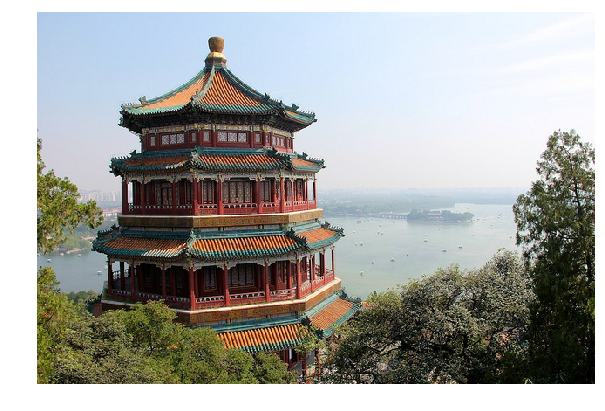

In [158]:
plt.figure(figsize=(10,7))
plot_image(china)

Crop it and convert it to grayscale:

In [159]:
image = china[150:220, 130:250].mean(axis=2).astype(np.float32)
image.shape

(70, 120)

In [160]:
height, width = image.shape
channels = 1  # grayscale

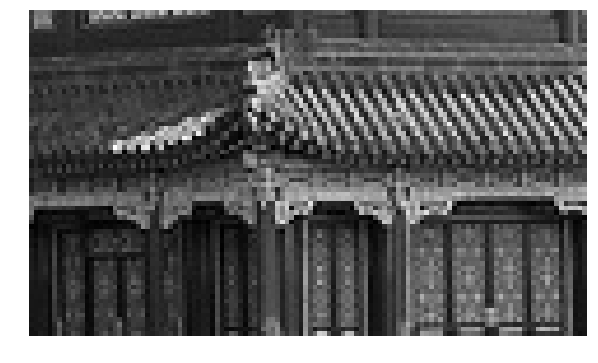

In [161]:
plt.figure(figsize=(10,6))
plot_image(image)

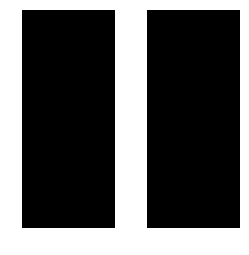

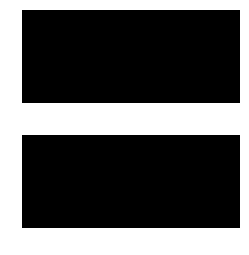

In [162]:
basic_filters = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)  # height, width, in channels, out channels
basic_filters[:, 3, 0, 0] = 1
basic_filters[3, :, 0, 1] = 1
plot_image(basic_filters[:, :, 0, 0])
plt.show()
plot_image(basic_filters[:, :, 0, 1])
plt.show()

In [163]:
graph = tf.Graph()
with graph.as_default():
    X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
    filters = tf.constant(basic_filters)
    convolution = tf.nn.conv2d(X, filters, strides=[1,1,1,1], padding="SAME")

In [164]:
with tf.Session(graph=graph) as sess:
    X_batch = image.reshape(1, height, width, 1)
    output = convolution.eval(feed_dict={X: X_batch})

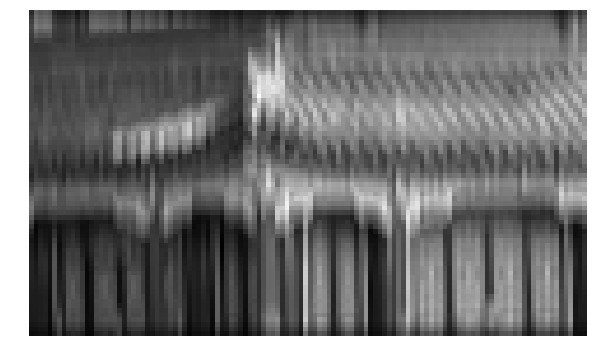

In [165]:
plt.figure(figsize=(10,6))
plot_image(output[0, :, :, 0])

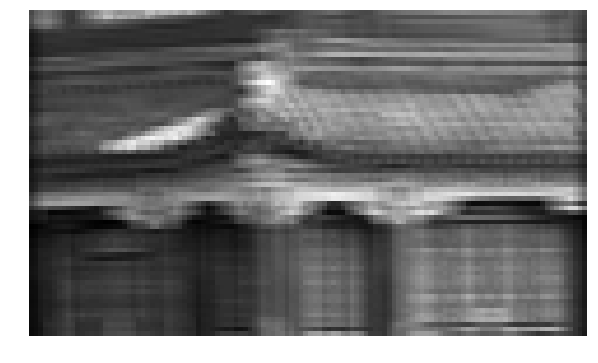

In [166]:
plt.figure(figsize=(10,6))
plot_image(output[0, :, :, 1])

Now let's add a max pooling layer:

In [167]:
graph = tf.Graph()
with graph.as_default():
    X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
    filters = tf.constant(basic_filters)
    convolution = tf.nn.conv2d(X, filters, strides=[1,1,1,1], padding="SAME")
    max_pool = tf.nn.max_pool(convolution, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")

In [168]:
with tf.Session(graph=graph) as sess:
    X_batch = image.reshape(1, height, width, 1)
    output = max_pool.eval(feed_dict={X: X_batch})

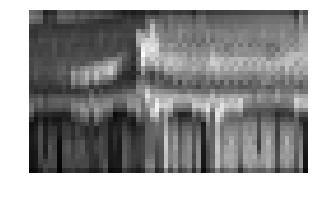

In [169]:
plt.figure(figsize=(5,3))
plot_image(output[0, :, :, 0])

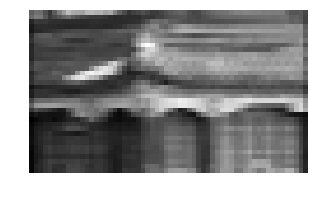

In [170]:
plt.figure(figsize=(5,3))
plot_image(output[0, :, :, 1])

## Exercise 10

![Exercise](https://c1.staticflickr.com/9/8101/8553474140_c50cf08708_b.jpg)

In this final exercise, you will tackle MNIST and reach over 99% accuracy using most of what you learned in this course:

* You model should be a Convolutional Neural Network composed of:
  * Two convolutional layers followed by a max pooling layer. The first convolutional layer should have 32 feature maps, and the second should have 64 feature maps. Both convolutional layers should use ReLU activation, 3x3 filters, SAME padding and stride 1.
  * One Fully Connected (FC) layer with 128 neurons, using ReLU activation.
  * A Fully Connected output layer with 10 outputs (to classify images in the 10 classes), using Softmax activation.
* You should apply a 25% dropout rate on the outputs of the max pooling layer, and a 50% dropout rate on the outputs of the first FC layer.
* As usual, you should minimize the cross-entropy, using an Adam optimizer.
* Make sure to initialize all variables using He initialization.
* Train the model using Early Stopping.
* Use the model to predict the class of all the images in the MNIST test set. Display all the wrong predictions it makes on the first 400 images, along with the probabilities it assigned to each class.

Try not to peek at the solution below before you have done the exercise! :)

![thinking](https://upload.wikimedia.org/wikipedia/commons/0/06/Filos_segundo_logo_%28flipped%29.jpg)

## Exercise 10 - Solution

In [171]:
height = 28
width = 28
channels = 1

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 1
conv2_pad = "SAME"
conv2_dropout_rate = 0.25

pool3_fmaps = conv2_fmaps

n_fc1 = 128
fc1_dropout_rate = 0.5

n_outputs = 10

graph = tf.Graph()
with graph.as_default():
    with tf.name_scope("inputs"):
        X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
        X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
        y = tf.placeholder(tf.int32, shape=[None], name="y")
        training = tf.placeholder_with_default(False, shape=[], name='training')

    conv1 = tf.layers.conv2d(X_reshaped, conv1_fmaps, kernel_size=conv1_ksize, strides=conv1_stride, padding=conv1_pad, activation=tf.nn.relu, name="conv1")
    conv2 = tf.layers.conv2d(conv1, conv2_fmaps, kernel_size=conv2_ksize, strides=conv2_stride, padding=conv2_pad, activation=tf.nn.relu, name="conv2")

    with tf.name_scope("pool3"):
        pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
        pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 14 * 14])
        pool3_flat_drop = tf.layers.dropout(pool3_flat, conv2_dropout_rate, training=training)

    with tf.name_scope("fc1"):
        fc1 = tf.layers.dense(pool3_flat_drop, n_fc1, activation=tf.nn.relu, name="fc1")
        fc1_drop = tf.layers.dropout(fc1, fc1_dropout_rate, training=training)

    with tf.name_scope("output"):
        logits = tf.layers.dense(fc1_drop, n_outputs, name="output")
        Y_proba = tf.nn.softmax(logits, name="Y_proba")

    with tf.name_scope("train"):
        xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
        loss = tf.reduce_mean(xentropy)
        optimizer = tf.train.AdamOptimizer()
        training_op = optimizer.minimize(loss)

    with tf.name_scope("eval"):
        correct = tf.nn.in_top_k(logits, y, 1)
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

    with tf.name_scope("init_and_save"):
        init = tf.global_variables_initializer()
        saver = tf.train.Saver()

Now let training begin, using early stopping. This is quite slow on a CPU, but much faster on a GPU. We achieve >99% accuracy on the test set.

In [172]:
n_epochs = 1000
batch_size = 50

best_acc_val = 0
check_interval = 100
checks_since_last_progress = 0
max_checks_without_progress = 100
best_model_params = None

with tf.Session(graph=graph) as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})
            if iteration % check_interval == 0:
                acc_val = accuracy.eval(feed_dict={X: mnist.test.images[:2000], y: mnist.test.labels[:2000]})
                if acc_val > best_acc_val:
                    best_acc_val = acc_val
                    checks_since_last_progress = 0
                    best_model_params = get_model_params()
                else:
                    checks_since_last_progress += 1
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images[2000:], y: mnist.test.labels[2000:]})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test, "Best validation accuracy:", best_acc_val)
        if checks_since_last_progress > max_checks_without_progress:
            print("Early stopping!")
            break

    if best_model_params:
        restore_model_params(best_model_params)
    acc_test = accuracy.eval(feed_dict={X: mnist.test.images[2000:], y: mnist.test.labels[2000:]})
    print("Final accuracy on test set:", acc_test)
    save_path = saver.save(sess, "./my_mnist_model")

0 Train accuracy: 0.94 Test accuracy: 0.985125 Best validation accuracy: 0.9765
1 Train accuracy: 1.0 Test accuracy: 0.98625 Best validation accuracy: 0.984
2 Train accuracy: 0.98 Test accuracy: 0.988875 Best validation accuracy: 0.9855
3 Train accuracy: 1.0 Test accuracy: 0.990625 Best validation accuracy: 0.9865
4 Train accuracy: 1.0 Test accuracy: 0.991625 Best validation accuracy: 0.9875
5 Train accuracy: 0.98 Test accuracy: 0.991 Best validation accuracy: 0.988
6 Train accuracy: 1.0 Test accuracy: 0.99175 Best validation accuracy: 0.99
7 Train accuracy: 1.0 Test accuracy: 0.992 Best validation accuracy: 0.99
8 Train accuracy: 1.0 Test accuracy: 0.99225 Best validation accuracy: 0.99
9 Train accuracy: 1.0 Test accuracy: 0.992875 Best validation accuracy: 0.99
10 Train accuracy: 1.0 Test accuracy: 0.992125 Best validation accuracy: 0.99
11 Train accuracy: 0.98 Test accuracy: 0.992625 Best validation accuracy: 0.99
12 Train accuracy: 1.0 Test accuracy: 0.993 Best validation accuracy:

In [173]:
with tf.Session(graph=graph) as sess:
    init.run()
    saver.restore(sess, "./my_mnist_model")
    Y_proba_val = Y_proba.eval(feed_dict={X: mnist.test.images[2000:2400]})

INFO:tensorflow:Restoring parameters from ./my_mnist_model


Label: 5, Prediction: 3, Probabilities: 3=88.9%   5=11.1%


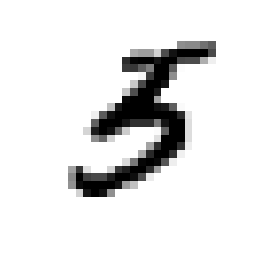

Label: 6, Prediction: 0, Probabilities: 0=99.4%


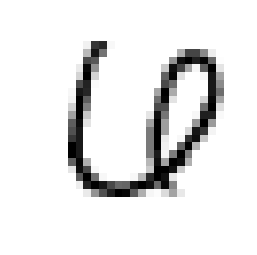

Label: 9, Prediction: 8, Probabilities: 8=94.5%   9=5.1%


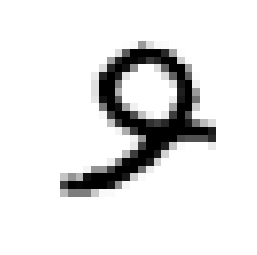

Label: 4, Prediction: 9, Probabilities: 9=99.8%


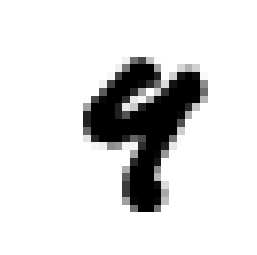

Label: 6, Prediction: 1, Probabilities: 1=92.1%   6=7.4%


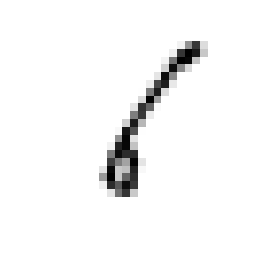

Label: 1, Prediction: 3, Probabilities: 3=99.2%


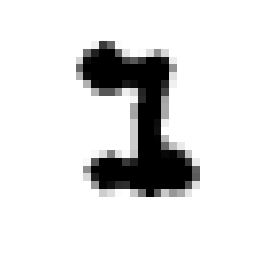

Label: 9, Prediction: 4, Probabilities: 0=4.1%   2=4.3%   4=91.0%


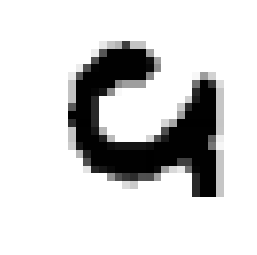

In [174]:
for image, y_label, y_proba in zip(mnist.test.images[2000:2400], mnist.test.labels[2000:2400], Y_proba_val):
    y_pred = np.argmax(y_proba)
    if y_pred != y_label:
        print("Label: {}, Prediction: {}, Probabilities: {}".format(
            y_label, y_pred,
            "   ".join(["{}={:.1f}%".format(n, 100*p)
                        for n, p in enumerate(y_proba) if p > 0.01])))
        plt.imshow(image.reshape(28, 28), cmap="binary")
        plt.axis("off")
        plt.show()    

# What Next?

* Practice, practice and practice!
* Go through the nice tutorials on tensorflow.org, in particular the transfer learning one.
* Buy [my book](http://shop.oreilly.com/product/0636920052289.do)! :)  There's a lot more material, including Recurrent Neural Networks, Deep Reinforcement Learning (including the amazing DeepMind stuff), Distributed TensorFlow, Autoencoders, and much more.
* Go through the notebooks on my other Github project [github.com/ageron/handson-ml](https://github.com/ageron/handson-ml).

[![book](http://akamaicovers.oreilly.com/images/0636920052289/cat.gif)](http://shop.oreilly.com/product/0636920052289.do)

I hope you enjoyed this course!